## Imports
<hr>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy import stats
from tabulate import tabulate
np.random.seed(1)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [133]:
# returns the optimal no of bins based on sturges formula when given a dataframe
def bin_sturges(df):
    return int(np.ceil(3.322*np.log2(df.shape[0])) + 1)

In [134]:
# Plots the scatter plot and Histogram for all columsn given a dataframe
def univ_analysis(df):
    cols = df.columns
    n_cols = len(cols)
    n_bins = bin_sturges(df)
    
    fig, ax = plt.subplots(n_cols,2, figsize=(18,7*n_cols), gridspec_kw={'width_ratios':[3,2]})
    
    for i in range(n_cols):
        ax[i,0].scatter(df.index.to_list(),df[cols[i]], color='navy')
        ax[i,0].set_xlabel(cols[i], fontsize=15)
        ax[i,0].set_ylabel(cols[i], fontsize=15)
        ax[i,0].set_xlabel('Index', fontsize=15)
        
        ax[i,0].set_title(str(i+1)+'. '+str(cols[i]), fontsize=17)
        
        ax[i,1].hist(df[cols[i]], bins=n_bins, color='navy', edgecolor='white')
        ax[i,1].set_xlabel(cols[i], fontsize=15)
        ax[i,1].set_ylabel('Frequency', fontsize=15)
        ax[i,1].grid(ls='--')
        ax[i,1].set_title(str(i+1)+'. '+str(cols[i]), fontsize=17)
    plt.show()

## Question 1
<ol>Using the matplotlib defaults. (matplotlib is a python package we used in our sample code).
<li>Adjusting alpha and marker size to compensate for overplotting.
<li>Using a hexbin plot.
<li>Subsampling the dataset.
<br>For each but the first one, ensure that all the plotting area is used in a reasonable way and that as much
information as possible is conveyed; this is somewhat subjective and there is no one right answer.
Answer this question based on what you find: in what areas are most of the anomalies (measurements)
located?</ul>

#### <i><hr>1.1 Adjusting alpha and marker size to compensate for overplotting

In [ ]:
df = pd.read_csv('fire_archive_V1_96617.csv')
df.head()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0 -34.45902  150.88040       326.5  0.60   0.71  2019-08-01       246   
1 -31.70724  151.07191       367.0  0.56   0.69  2019-08-01       247   
2 -31.39626  149.65253       325.2  0.68   0.74  2019-08-01       247   
3 -30.39774  152.06432       347.8  0.48   0.65  2019-08-01       247   
4 -31.20248  151.89766       350.7  0.50   0.66  2019-08-01       247   

  satellite instrument confidence  version  bright_ti5   frp  type  
0         N      VIIRS          n        1       290.7   5.8     3  
1         N      VIIRS          h        1       291.9  10.4     0  
2         N      VIIRS          n        1       292.7   5.6     0  
3         N      VIIRS          n        1       287.6   9.1     0  
4         N      VIIRS          n        1       292.3   9.4     0

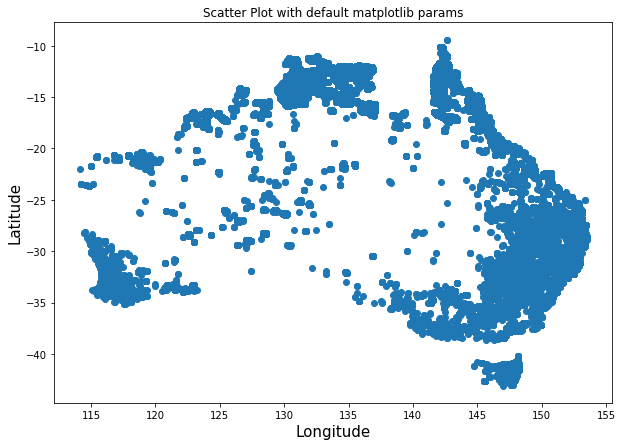

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(df['longitude'], df['latitude'])
ax.set_ylabel('Latitude', fontsize='15')
ax.set_xlabel('Longitude', fontsize='15')

plt.title('Scatter Plot with default matplotlib params')
plt.show()

<hr>
<i><b> Trying out various combinations of marker size and alphas where aim is to reduce overplotting

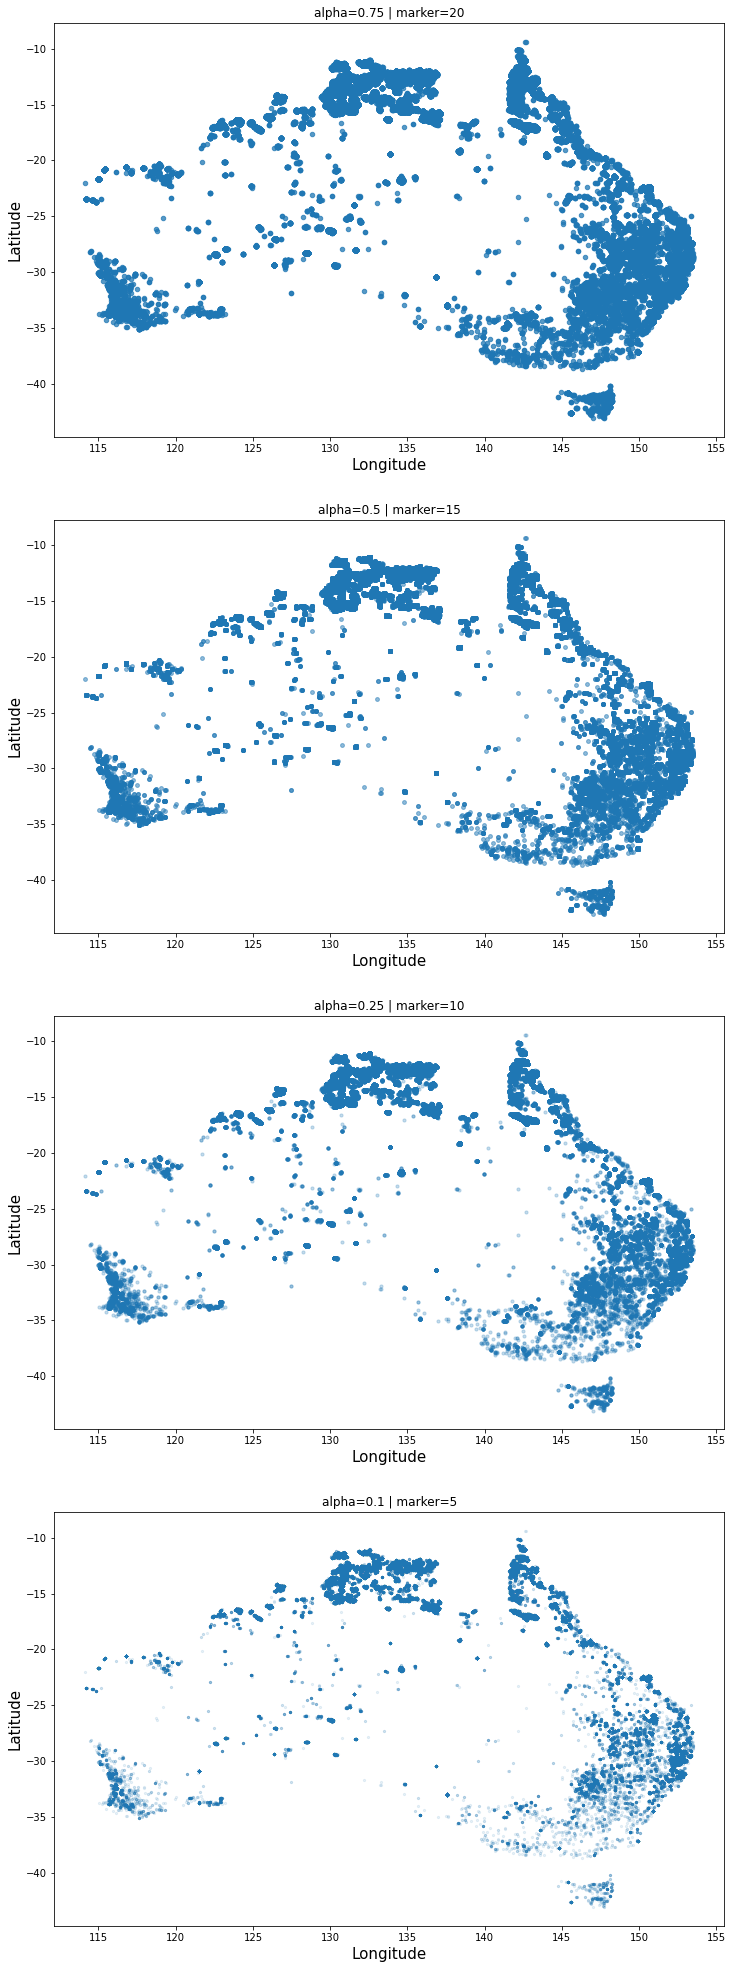

In [ ]:
fig, ax = plt.subplots(4,figsize=(12,7*5))
alphas=[0.75, 0.5, 0.25, 0.1]
msizes = [20, 15, 10, 5]

for i in range(4):
    ax[i].set_title('alpha='+str(alphas[i])+' | marker='+str(msizes[i]))
    ax[i].scatter(df['longitude'], df['latitude'], alpha=alphas[i], s=msizes[i])
    ax[i].set_ylabel('Latitude', fontsize='15')
    ax[i].set_xlabel('Longitude', fontsize='15')

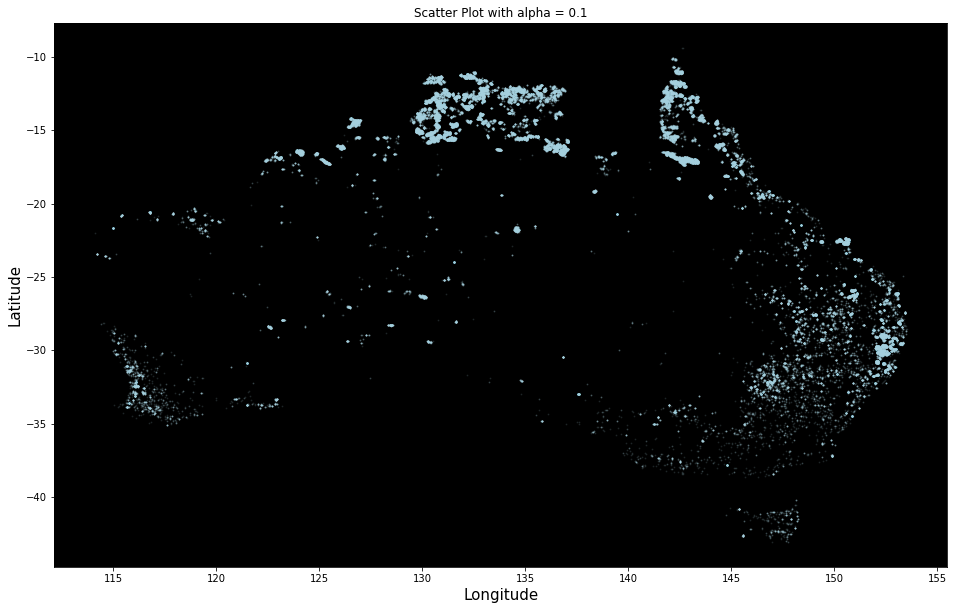

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))

plt.title('Scatter Plot with alpha = 0.1')

ax.scatter(df['longitude'], df['latitude'], alpha=0.1, s=1, color='lightblue')
ax.set_facecolor((0,0,0))
ax.set_ylabel('Latitude', fontsize='15')
ax.set_xlabel('Longitude', fontsize='15')

plt.show()

<i><b> Changed the markersize to 1 and reduced alpha, so that overlapping can be reduced. TO make small and light points more visible, changed the background and marker colors
    <hr>

#### <i>1.2 Use Hexbin plot

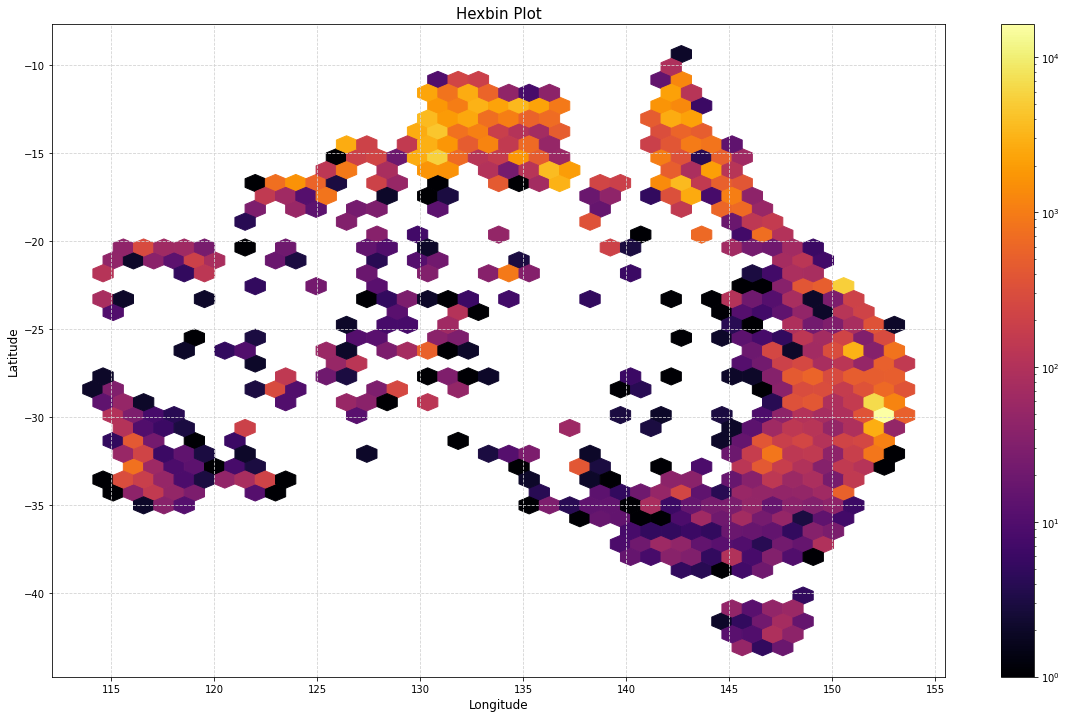

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
fig1 = ax.hexbin(df['longitude'], df['latitude'], gridsize=40, cmap='inferno', bins='log')

plt.title('Hexbin Plot', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(ls='--', color='lightgray')
plt.colorbar(fig1)
plt.show()

<i><b>Using hexbon plot we can clearly see for which location we have most of the data, i.e distribution of the data on 2D space
<br> Most of the data is contained in the East and Northern regions, central region has comparatively lower amount of data
#### <i><hr>1.3 Subsampling the dataset.

In [ ]:
# Sample 10* from original data, then subsample 10% from sample, so subsample represents 1% of the original data
sample_r = df.sample(frac=0.1, replace=True, random_state=1)
subsample_r = sample_r.sample(frac=0.1, replace=True, random_state=1)
ssubsample_r = subsample_r.sample(frac=0.1, replace=True, random_state=1)


# without replacement, subsample represents 1% of the original data
sample = df.sample(frac=0.1, replace=False, random_state=1)
subsample = sample.sample(frac=0.1, replace=False, random_state=1)
ssubsample = subsample.sample(frac=0.1, replace=False, random_state=1)

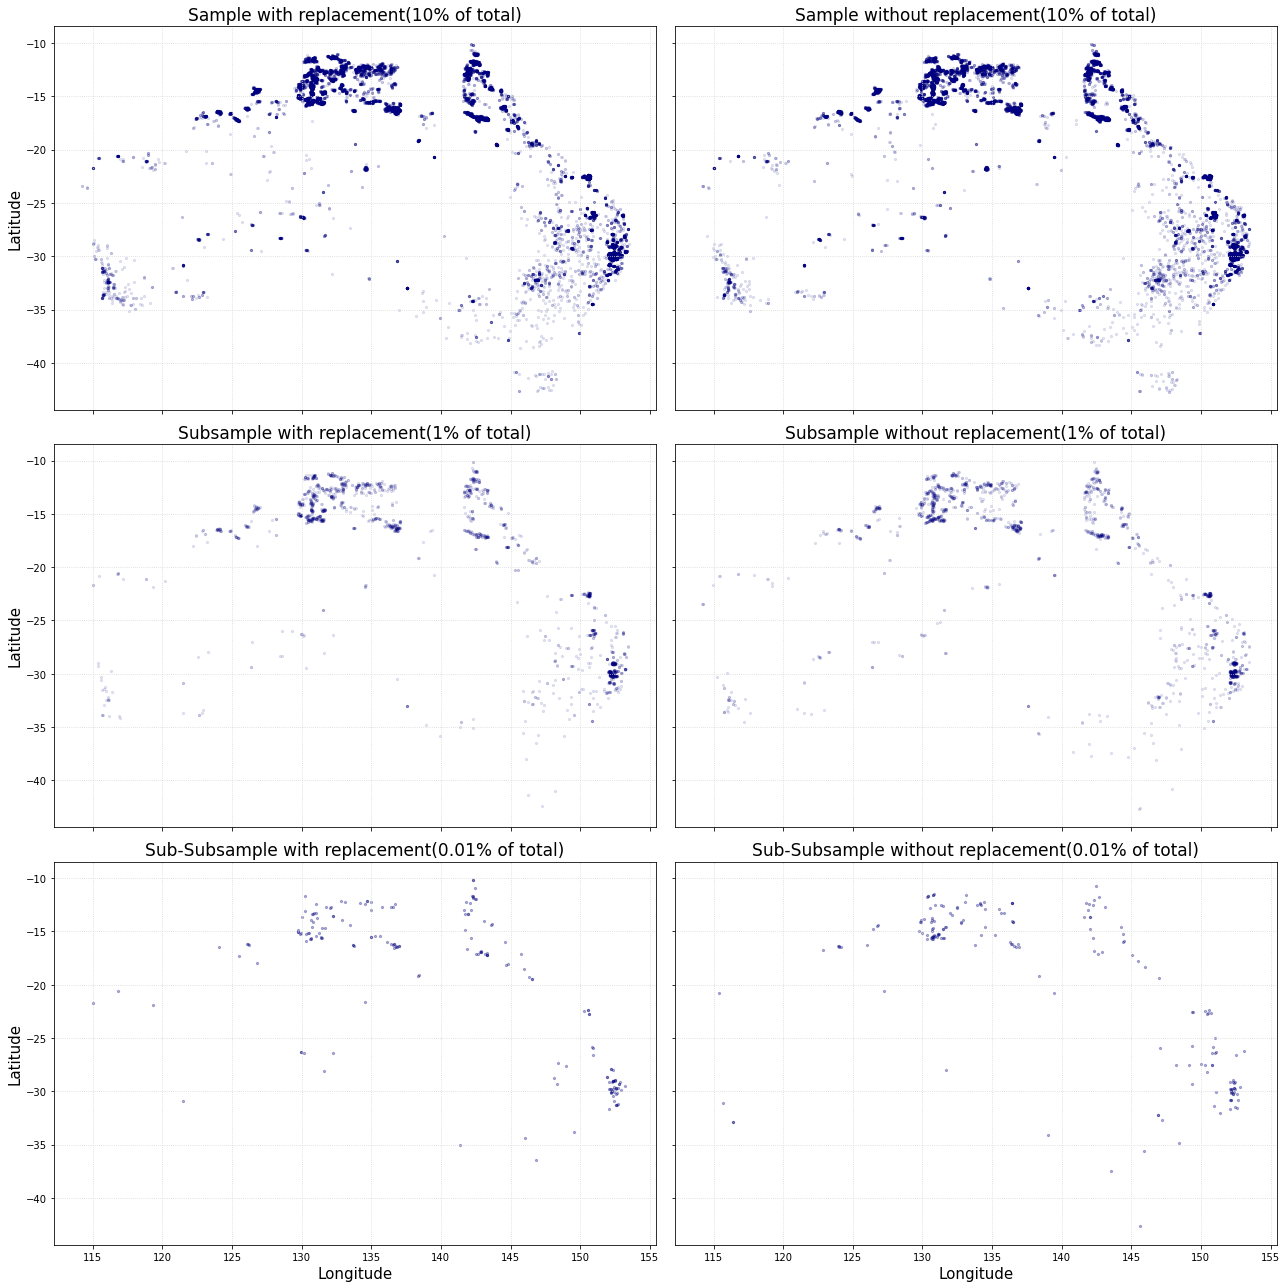

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(18,18), layout='tight', sharey=True, sharex=True)

ax[0,0].scatter(sample_r['longitude'], sample_r['latitude'], cmap='jet', color='navy', alpha=0.1, s=5)
ax[0,0].set_ylabel('Latitude', fontsize=15)
# ax[0,0].set_xlabel('Longitude', fontsize=15)
ax[0,0].set_title('Sample with replacement(10% of total)', fontsize=17)
# # adjusting axes limits so that the entire figure is used to represent data
# ax.set_xlim([df['longitude'].describe()['min']-0.5, df['longitude'].describe()['max']+0.5])
# ax.set_ylim([df['latitude'].describe()['min']-0.5, df['latitude'].describe()['max']+0.5])
ax[0,0].grid(ls=':', color='lightgray')

ax[0,1].scatter(sample['longitude'], sample['latitude'], cmap='jet', color='navy', alpha=0.1, s=5)
# ax[0,1].set_ylabel('Latitude', fontsize=15)
# ax[0,1].set_xlabel('Longitude', fontsize=15)
ax[0,1].set_title('Sample without replacement(10% of total)', fontsize=17)
ax[0,1].grid(ls=':', color='lightgray')

ax[1,0].scatter(subsample_r['longitude'], subsample_r['latitude'], cmap='jet', color='navy', alpha=0.1, s=5)
ax[1,0].set_ylabel('Latitude', fontsize=15)
# ax[1,0].set_xlabel('Longitude', fontsize=15)
ax[1,0].set_title('Subsample with replacement(1% of total)', fontsize=17)
ax[1,0].grid(ls=':', color='lightgray')

ax[1,1].scatter(subsample['longitude'], subsample['latitude'], cmap='jet', color='navy', alpha=0.1, s=5)
# ax[1,1].set_ylabel('Latitude', fontsize=15)
# ax[1,1].set_xlabel('Longitude', fontsize=15)
ax[1,1].set_title('Subsample without replacement(1% of total)', fontsize=17)
ax[1,1].grid(ls=':', color='lightgray')

ax[2,0].scatter(ssubsample_r['longitude'], ssubsample_r['latitude'], cmap='jet', color='navy', alpha=0.3, s=5)
ax[2,0].set_ylabel('Latitude', fontsize=15)
ax[2,0].set_xlabel('Longitude', fontsize=15)
ax[2,0].set_title('Sub-Subsample with replacement(0.01% of total)', fontsize=17)
ax[2,0].grid(ls=':', color='lightgray')

ax[2,1].scatter(ssubsample['longitude'], ssubsample['latitude'], cmap='jet', color='navy', alpha=0.3, s=5)
# ax[2,1].set_ylabel('Latitude', fontsize=15)
ax[2,1].set_xlabel('Longitude', fontsize=15)
ax[2,1].set_title('Sub-Subsample without replacement(0.01% of total)', fontsize=17)
ax[2,1].grid(ls=':', color='lightgray')

plt.show()

<i><b>From here also we can conclude that the points which are in the sub-sample plots are where we have more data from, since this represents only 0.01% of the total data and because the probably to randomly pick a datapoint from location which has more data points will be more. Hence, we can say that most of the measurements/data-points(anomalies) are located in the eastern and northern regions.
<hr>

## Question 2
<ol>   
Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate settings). Let’s
assume we are certain of a fire if the value of temperature I-4 is saturated as visible from the histogram.
<li>Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs long for
those points with brightness saturated and a separate for those who are not (within the same figure on
separate axes). You can pick any of the methods from the question above that you find most suitable.
Can you spot differences in the distributions?
<li>Plot both groups in the same axes with different colors. Try changing the order of plotting the two
classes (i.e. draw the saturated first then the non-saturated or the other way around). Make sure to
include a legend. How does that impact the result?
<li>Can you find a better way to compare the two distributions?

#### <i>2.1 Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs long for those points with brightness saturated and a separate for those who are not (within the same figure on separate axes). You can pick any of the methods from the question above that you find most suitable. Can you spot differences in the distributions?

In [ ]:
df = pd.read_csv('fire_archive_V1_96617.csv')
df.head(2)

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0 -34.45902  150.88040       326.5  0.60   0.71  2019-08-01       246   
1 -31.70724  151.07191       367.0  0.56   0.69  2019-08-01       247   

  satellite instrument confidence  version  bright_ti5   frp  type  
0         N      VIIRS          n        1       290.7   5.8     3  
1         N      VIIRS          h        1       291.9  10.4     0

count    184778.000000
mean        331.579243
std          20.761619
min         208.000000
25%         310.900000
50%         335.900000
75%         346.700000
max         367.000000
Name: bright_ti4, dtype: float64


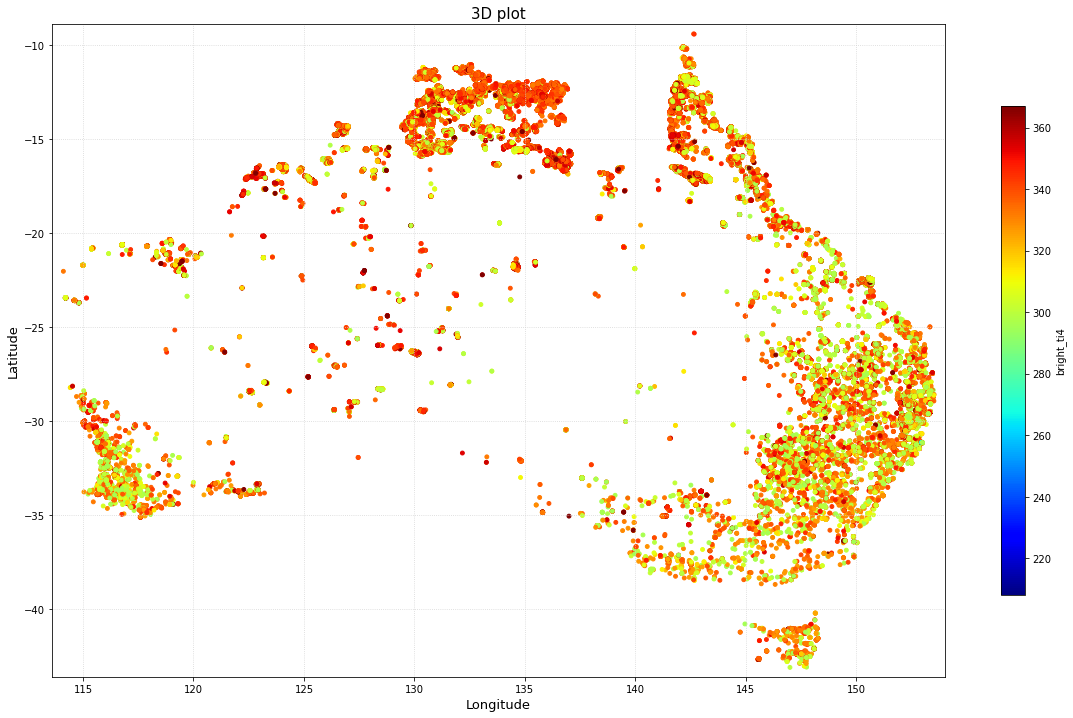

In [ ]:
print(df['bright_ti4'].describe())
fig, ax = plt.subplots(figsize=(20,12))

fig1 = ax.scatter(df['longitude'], df['latitude'], c=df['bright_ti4'], cmap='jet', s=15)
ax.set_ylabel('Latitude', fontsize='13')
ax.set_xlabel('Longitude', fontsize='13')

# adjusting axes limits so that the entire figure is used to represent data
ax.set_xlim([df['longitude'].describe()['min']-0.5, df['longitude'].describe()['max']+0.5])
ax.set_ylim([df['latitude'].describe()['min']-0.5, df['latitude'].describe()['max']+0.5])
plt.colorbar(fig1, label='bright_ti4', shrink=0.75)
plt.title('3D plot', fontsize=15)
plt.grid(ls=':', color='lightgray')
plt.show()

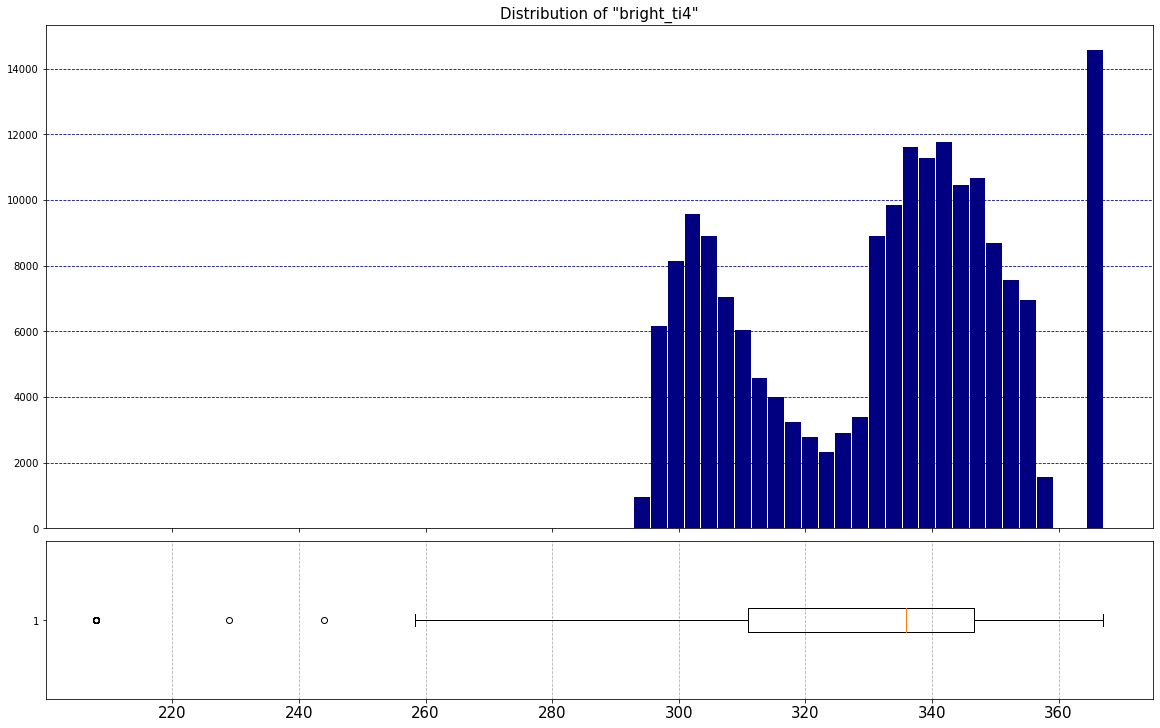

In [ ]:
fig, ax = plt.subplots(2, layout='constrained', figsize=(16,10), gridspec_kw={'height_ratios':[4,1.25]}, sharex=True)
''', gridspec_kw={'width_ratios':[1,1]}'''

ax[0].set_title('Distribution of "bright_ti4"', fontsize=15)
ax[0].hist(df['bright_ti4'], bins=bin_sturges(df), color='navy', edgecolor='white')
# ax[0].tick_params(axis='x', labelsize=15)
ax[0].grid(ls='--', axis='y', color='navy')

# ax[1].set_title('Box Plot', loc='right')
ax[1].boxplot(df['bright_ti4'], vert=False)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].grid(ls='--', axis='x')

plt.show()

<i><b>The bin with highest number of instances has bright_ti4 > 360(not exact), so assuming this as saturation point. I think this is because this is the maximum brightness value a satelite can capture, so we are certain that any value above the maximum possible pixel value indicates fire. Thats why I choose 360 as the saturation point.
<hr>

In [ ]:
saturated = df[df['bright_ti4']>360]
unsaturated = df[df['bright_ti4']<360]
print('Saturated: ', saturated.shape)
print('Unsaturated: ', unsaturated.shape)

Saturated:  (14611, 14)
Unsaturated:  (170167, 14)


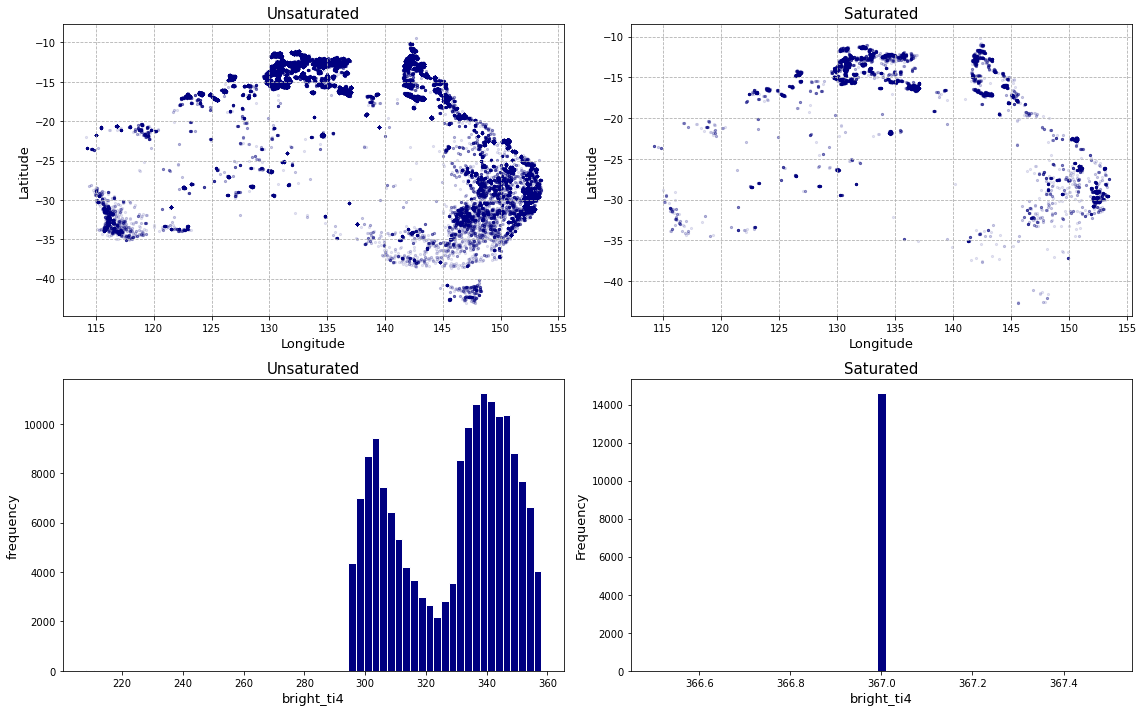

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(16,10), layout='tight')

ax[0,0].scatter(unsaturated['longitude'], unsaturated['latitude'], alpha=0.1, color='navy', s=5)
ax[0,0].set_ylabel('Latitude', fontsize=13)
ax[0,0].set_xlabel('Longitude', fontsize=13)
ax[0,0].set_title('Unsaturated', fontsize=15)
ax[0,0].grid(ls='--')

ax[0,1].scatter(saturated['longitude'], saturated['latitude'], alpha=0.1, color='navy', s=5)
ax[0,1].set_ylabel('Latitude', fontsize=13)
ax[0,1].set_xlabel('Longitude', fontsize=13)
ax[0,1].set_title('Saturated', fontsize=15)
ax[0,1].grid(ls='--')

ax[1,0].hist(unsaturated['bright_ti4'], bins=bin_sturges(unsaturated), color='navy', edgecolor='white')
ax[1,0].set_ylabel('frequency', fontsize=13)
ax[1,0].set_xlabel('bright_ti4', fontsize=13)
ax[1,0].set_title('Unsaturated', fontsize=15)

ax[1,1].hist(saturated['bright_ti4'], bins=bin_sturges(saturated), color='navy', edgecolor='white')
ax[1,1].set_ylabel('Frequency', fontsize=13)
ax[1,1].set_xlabel('bright_ti4', fontsize=13)
ax[1,1].set_title('Saturated', fontsize=15)
plt.show()

#### <i><hr>2.2 Plot both groups in the same axes with different colors. Try changing the order of plotting the two classes (i.e. draw the saturated first then the non-saturated or the other way around). Make sure to include a legend. How does that impact the result?</i>

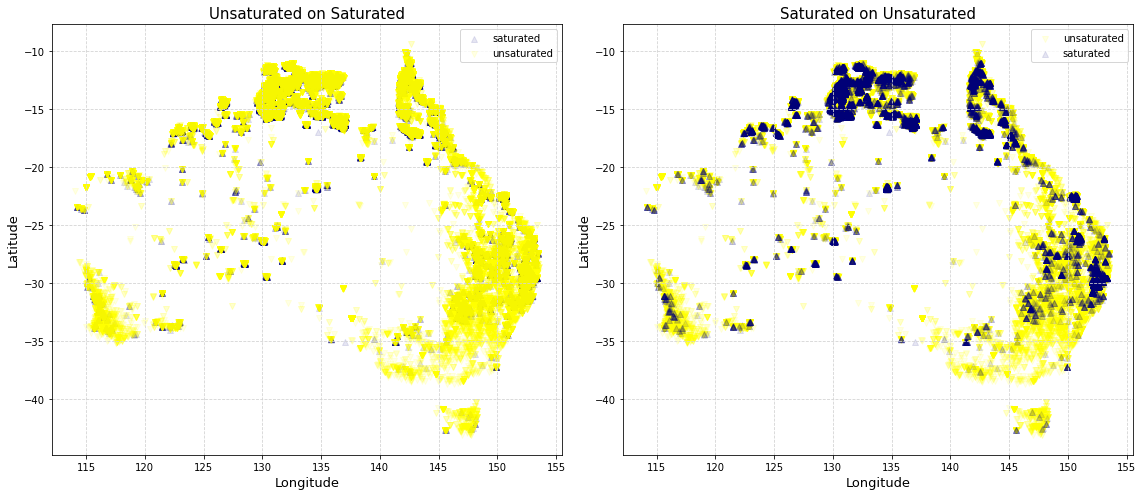

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,7), layout='tight')

plt.subplot(1,2,1)
ax1.scatter(saturated['longitude'], saturated['latitude'], alpha=0.1, color='navy', label='saturated', marker='^')
ax1.scatter(unsaturated['longitude'], unsaturated['latitude'], alpha=0.1, color='yellow', label='unsaturated', marker='v')
ax1.set_ylabel('Latitude', fontsize=13)
ax1.set_xlabel('Longitude', fontsize=13)
plt.title('Unsaturated on Saturated', fontsize=15)
plt.grid(ls='--', color='lightgray')
plt.legend()

plt.subplot(1,2,2)
ax2.scatter(unsaturated['longitude'], unsaturated['latitude'], alpha=0.1, color='yellow', label='unsaturated', marker='v')
ax2.scatter(saturated['longitude'], saturated['latitude'], alpha=0.1, color='navy', label='saturated', marker='^')
ax2.set_ylabel('Latitude', fontsize=13)
ax2.set_xlabel('Longitude', fontsize=13)
plt.title('Saturated on Unsaturated', fontsize=15)
plt.grid(ls='--', color='lightgray')

plt.legend()
plt.show()

<b><i>From the graph above we can observe that there is significant overlap between the unsaturated and saturated datapoints, but by plotting one group over other we can reduce overplotting of the group that is plotted above another one.

#### <hr>2.3 Can you find a better way to compare the two distributions?

We can plot different graphs for saturated and unsaturated data, hexbin plot or 2d histogram can be used to visualize the distributions

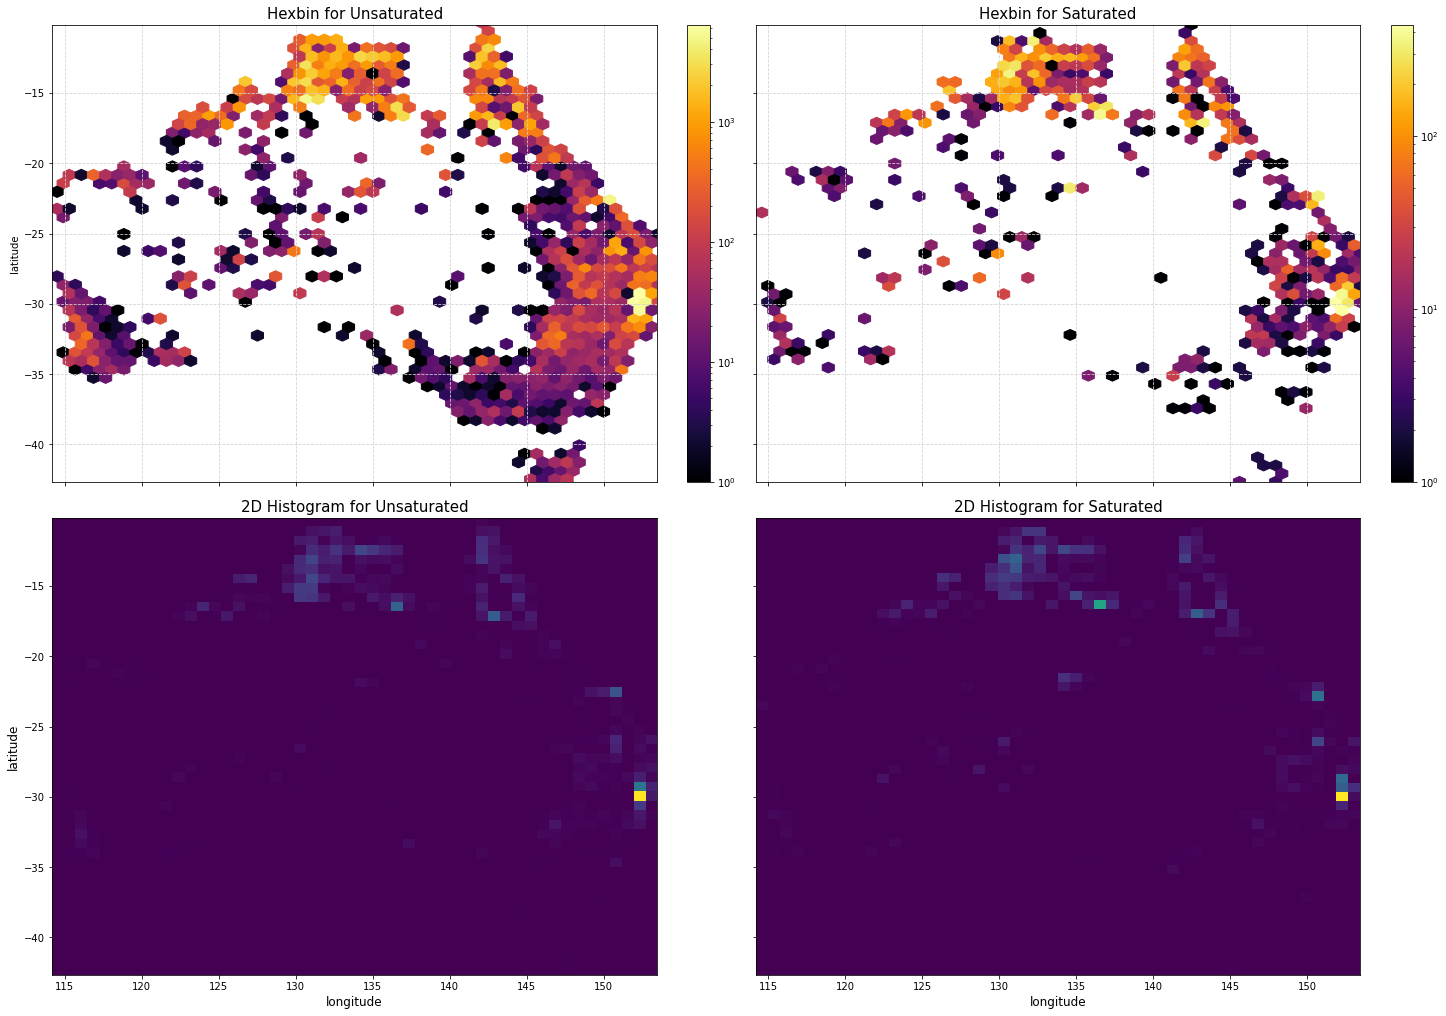

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,14), layout='constrained', sharex=True, sharey=True)

fig1=ax[0,0].hexbin(unsaturated['longitude'], unsaturated['latitude'], gridsize=50, cmap='inferno', bins='log')
ax[0,0].set_title('Hexbin for Unsaturated', fontsize=15)
ax[0,0].grid(ls='--', color='lightgray')
ax[0,0].set_ylabel('latitude')
plt.colorbar(fig1, ax=ax[0,0])

fig2=ax[0,1].hexbin(saturated['longitude'], saturated['latitude'], gridsize=50, cmap='inferno', bins='log')
ax[0,1].set_title('Hexbin for Saturated', fontsize=15)
ax[0,1].grid(ls='--', color='lightgray')
plt.colorbar(fig2, ax=ax[0,1])

ax[1,0].hist2d(unsaturated['longitude'], unsaturated['latitude'], bins=(50, 50))
ax[1,0].set_title('2D Histogram for Unsaturated', fontsize=15)
ax[1,0].set_ylabel('latitude', fontsize=12)
ax[1,0].set_xlabel('longitude', fontsize=12)

ax[1,1].hist2d(saturated['longitude'], saturated['latitude'], bins=(50, 50))
ax[1,1].set_title('2D Histogram for Saturated', fontsize=15)
ax[1,1].set_xlabel('longitude', fontsize=12)
plt.show()

<b><i>I think here, using the 2d hsitogram, we are able to see a location where most of the data is collected from, thats why I think that better way to visualize the distribution would be 2d histogram and also hexbin
<hr>
<b><i>Also along with histogram, we can use KDE for smoothing to visualize the distribution of data better

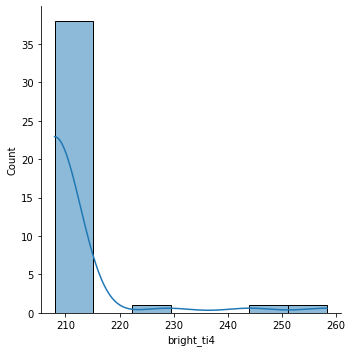

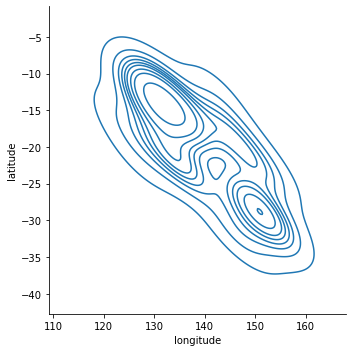

In [ ]:
sns.displot(unsaturated['bright_ti4'], kde=True)
sns.displot(x=unsaturated['longitude'], y=unsaturated['latitude'], kind="kde")

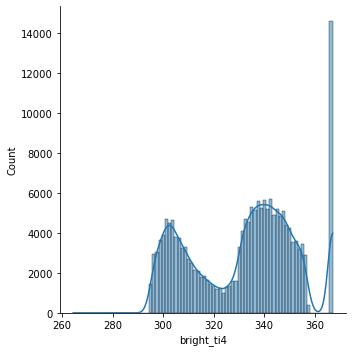

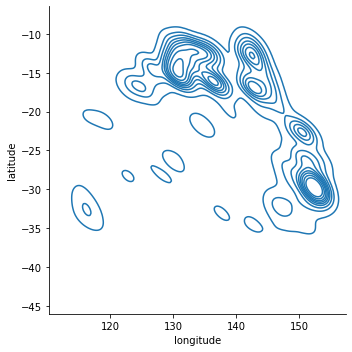

In [ ]:
sns.displot(saturated['bright_ti4'], kde=True)
sns.displot(x=saturated['longitude'], y=saturated['latitude'], kind="kde")

<hr><b><i>Now trying, 260 as saturation boundary since it is the lower fence of boxplot(plotted before)<br>plotting the same plots again

Saturated:  (184737, 14)
Unsaturated:  (41, 14)


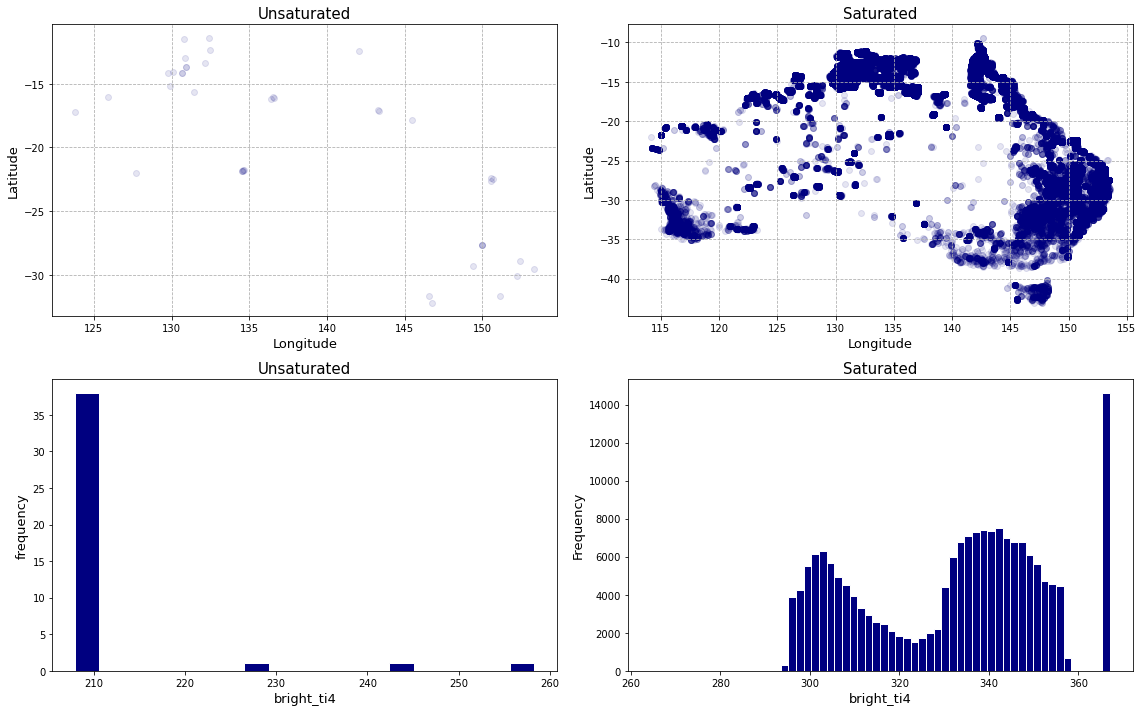

In [ ]:
saturated = df[df['bright_ti4']>260]
unsaturated = df[df['bright_ti4']<260]
print('Saturated: ', saturated.shape)
print('Unsaturated: ', unsaturated.shape)

fig, ax = plt.subplots(2,2,figsize=(16,10), layout='tight')

ax[0,0].scatter(unsaturated['longitude'], unsaturated['latitude'], alpha=0.1, color='navy')
ax[0,0].set_ylabel('Latitude', fontsize=13)
ax[0,0].set_xlabel('Longitude', fontsize=13)
ax[0,0].set_title('Unsaturated', fontsize=15)
ax[0,0].grid(ls='--')

ax[0,1].scatter(saturated['longitude'], saturated['latitude'], alpha=0.1, color='navy')
ax[0,1].set_ylabel('Latitude', fontsize=13)
ax[0,1].set_xlabel('Longitude', fontsize=13)
ax[0,1].set_title('Saturated', fontsize=15)
ax[0,1].grid(ls='--')

ax[1,0].hist(unsaturated['bright_ti4'], bins=bin_sturges(unsaturated), color='navy', edgecolor='white')
ax[1,0].set_ylabel('frequency', fontsize=13)
ax[1,0].set_xlabel('bright_ti4', fontsize=13)
ax[1,0].set_title('Unsaturated', fontsize=15)

ax[1,1].hist(saturated['bright_ti4'], bins=bin_sturges(saturated), color='navy', edgecolor='white')
ax[1,1].set_ylabel('Frequency', fontsize=13)
ax[1,1].set_xlabel('bright_ti4', fontsize=13)
ax[1,1].set_title('Saturated', fontsize=15)
plt.show()

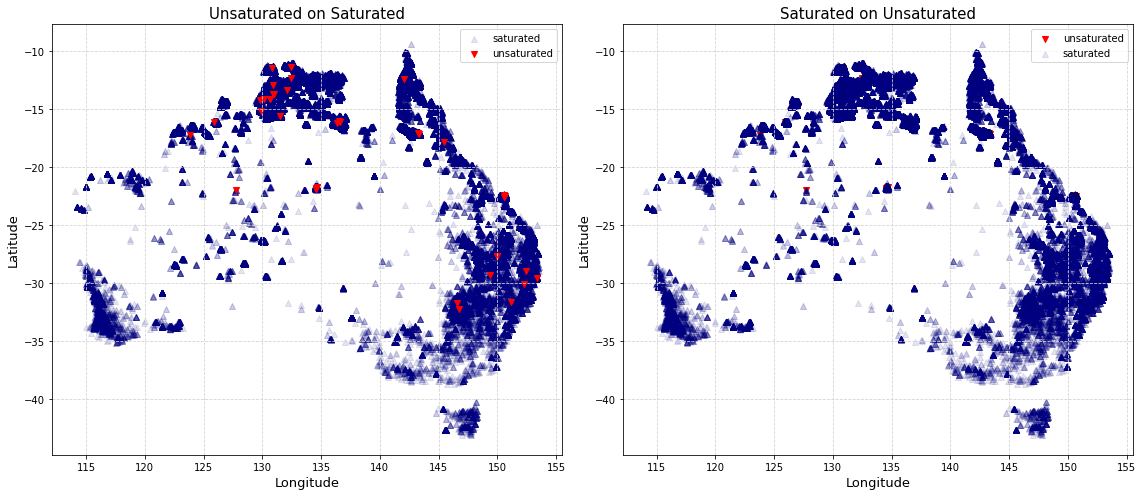

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,7), layout='tight')

plt.subplot(1,2,1)
ax1.scatter(saturated['longitude'], saturated['latitude'], alpha=0.1, color='navy', label='saturated', marker='^')
ax1.scatter(unsaturated['longitude'], unsaturated['latitude'], alpha=1, color='red', label='unsaturated', marker='v')
ax1.set_ylabel('Latitude', fontsize=13)
ax1.set_xlabel('Longitude', fontsize=13)
plt.title('Unsaturated on Saturated', fontsize=15)
plt.grid(ls='--', color='lightgray')
plt.legend()

plt.subplot(1,2,2)
ax2.scatter(unsaturated['longitude'], unsaturated['latitude'], alpha=1, color='red', label='unsaturated', marker='v')
ax2.scatter(saturated['longitude'], saturated['latitude'], alpha=0.1, color='navy', label='saturated', marker='^')
ax2.set_ylabel('Latitude', fontsize=13)
ax2.set_xlabel('Longitude', fontsize=13)
plt.title('Saturated on Unsaturated', fontsize=15)
plt.grid(ls='--', color='lightgray')

plt.legend()
plt.show()

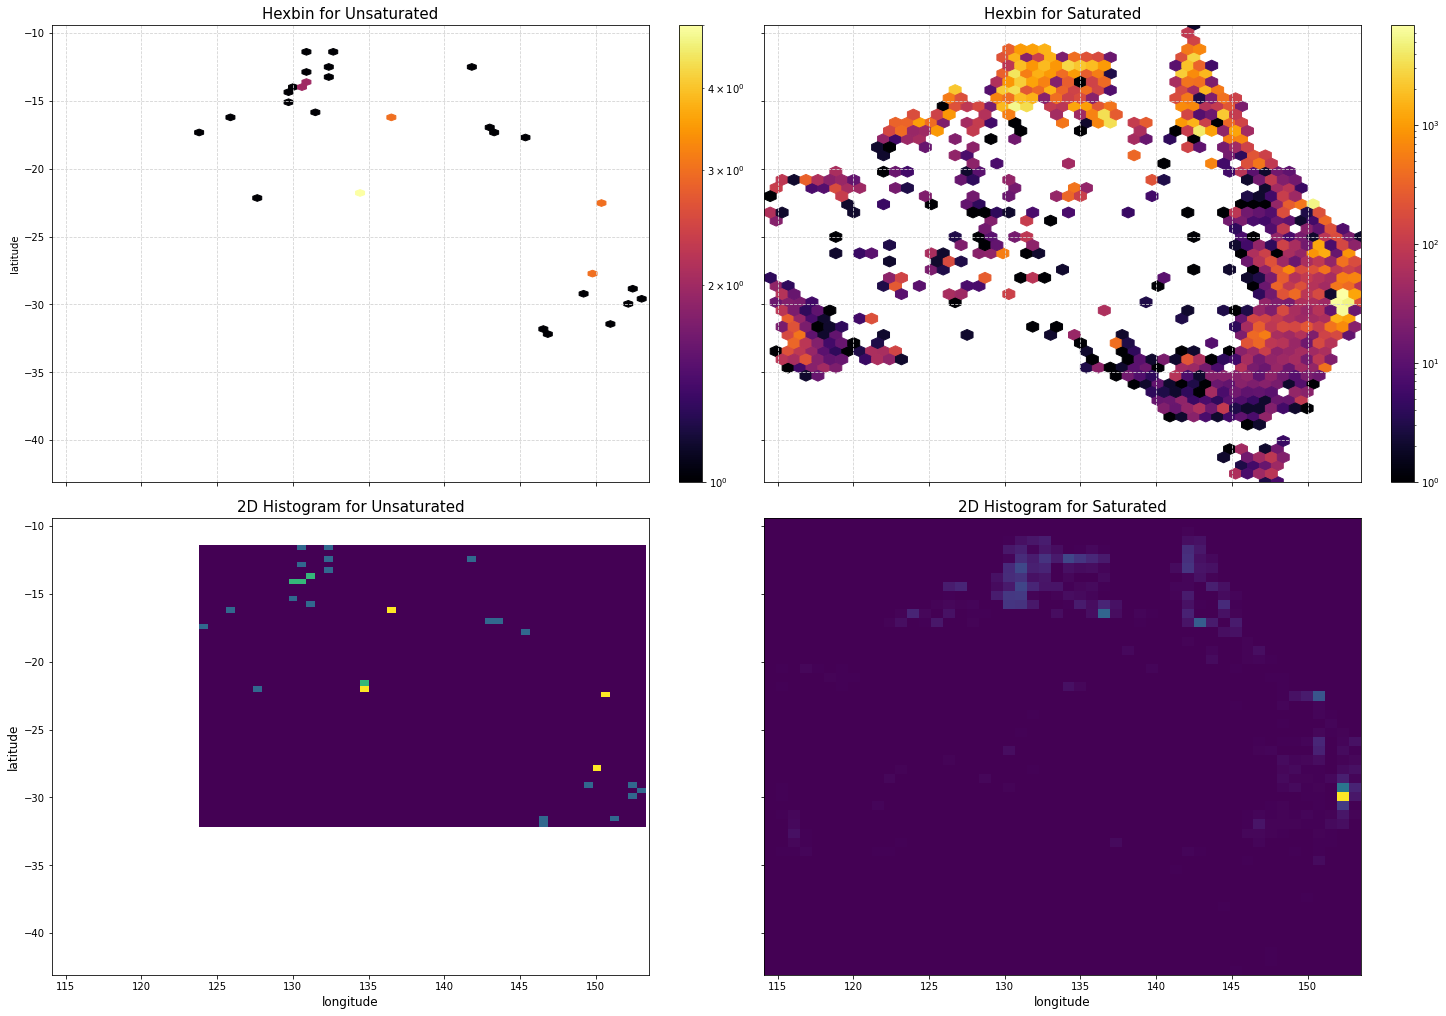

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,14), layout='constrained', sharex=True, sharey=True)

fig1=ax[0,0].hexbin(unsaturated['longitude'], unsaturated['latitude'], gridsize=50, cmap='inferno', bins='log')
ax[0,0].set_title('Hexbin for Unsaturated', fontsize=15)
ax[0,0].grid(ls='--', color='lightgray')
ax[0,0].set_ylabel('latitude')
plt.colorbar(fig1, ax=ax[0,0])

fig2=ax[0,1].hexbin(saturated['longitude'], saturated['latitude'], gridsize=50, cmap='inferno', bins='log')
ax[0,1].set_title('Hexbin for Saturated', fontsize=15)
ax[0,1].grid(ls='--', color='lightgray')
plt.colorbar(fig2, ax=ax[0,1])

ax[1,0].hist2d(unsaturated['longitude'], unsaturated['latitude'], bins=(50, 50))
ax[1,0].set_title('2D Histogram for Unsaturated', fontsize=15)
ax[1,0].set_ylabel('latitude', fontsize=12)
ax[1,0].set_xlabel('longitude', fontsize=12)

ax[1,1].hist2d(saturated['longitude'], saturated['latitude'], bins=(50, 50))
ax[1,1].set_title('2D Histogram for Saturated', fontsize=15)
ax[1,1].set_xlabel('longitude', fontsize=12)
plt.show()

## Question 3
You can load the Sydney dataset from https://www.kaggle.com/shree1992/housedata where you can
also find a description. The goal is to predict the ’price’ column. For this task, you can ignore the date.<br>
<ol><li>Determine which features are continuous vs. categorical. Drop rows without a valid sales price.
<li>Visualize the univariate distribution of each continuous variable, and the distribution of the target.
Do you notice anything? Is there something that might require special treatment?
<li>Visualize the dependency of the target on each continuous feature (2d scatter plot).
<li>Split the data in training and testing set. Use ColumnTransformer to encode categorical variables.
Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and
Elasticnet (although we haven’t talked about these methods yet, but you can easily find references
online and you can use provided functions by Scikit-learn or other packages directly) using cross-
validation with the default parameters. Dose scaling the data with StandardScaler help? Use the
preprocessing that works best going forward.</ol>

### <hr>3.1 Determine which features are continuous vs. categorical. Drop rows without a valid sales price
<i><b>Checking if there are any Missing Zero values in the dataset or not, there are no missing values, as we can see below

In [ ]:
root = '/content/drive/MyDrive/mac_gdrive/P556 AMLearning/notebooks/'
df = pd.read_csv(root+'q3_house.csv')
df.head(2)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0        1.5         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0        2.5         3650      9050   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   

   yr_renovated                street       city  statezip country  
0          2005  18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0       709 W Blaine St    Seattle  WA 98119     USA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isin([0]).sum()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

<i><b>Attributes with Zero values are shown above, from which we must not consider objects with price=0, also more than 50% of the houses dont have the yr_renovated attribute filled, so we can think to drop this attribute later
<hr>

In [ ]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<i><b>There are no missing values, so no need to use SimpleImputer
<hr>

In [ ]:
df.describe(include='all')

date         price     bedrooms    bathrooms  \
count                  4600  4.600000e+03  4600.000000  4600.000000   
unique                   70           NaN          NaN          NaN   
top     2014-06-23 00:00:00           NaN          NaN          NaN   
freq                    142           NaN          NaN          NaN   
mean                    NaN  5.519630e+05     3.400870     2.160815   
std                     NaN  5.638347e+05     0.908848     0.783781   
min                     NaN  0.000000e+00     0.000000     0.000000   
25%                     NaN  3.228750e+05     3.000000     1.750000   
50%                     NaN  4.609435e+05     3.000000     2.250000   
75%                     NaN  6.549625e+05     4.000000     2.500000   
max                     NaN  2.659000e+07     9.000000     8.000000   

         sqft_living      sqft_lot       floors   waterfront         view  \
count    4600.000000  4.600000e+03  4600.000000  4600.000000  4600.000000   
unique           NaN           NaN          NaN          NaN          NaN   
top              NaN           NaN          NaN          NaN          NaN   
freq             NaN           NaN          NaN          NaN          NaN   
mean     2139.346957  1.485252e+04     1.512065     0.007174     0.240652   
std       963.206916  3.588444e+04     0.538288     0.084404     0.778405   
min       370.000000  6.380000e+02     1.000000     0.000000     0.000000   
25%      1460.000000  5.000750e+03     1.000000     0.000000     0.000000   
50%      1980.000000  7.683000e+03     1.500000     0.000000     0.000000   
75%      2620.000000  1.100125e+04     2.000000     0.000000     0.000000   
max     13540.000000  1.074218e+06     3.500000     1.000000     4.000000   

          condition   sqft_above  sqft_basement     yr_built  yr_renovated  \
count   4600.000000  4600.000000    4600.000000  4600.000000   4600.000000   
unique          NaN          NaN            NaN          NaN           NaN   
top             NaN          NaN            NaN          NaN           NaN   
freq            NaN          NaN            NaN          NaN           NaN   
mean       3.451739  1827.265435     312.081522  1970.786304    808.608261   
std        0.677230   862.168977     464.137228    29.731848    979.414536   
min        1.000000   370.000000       0.000000  1900.000000      0.000000   
25%        3.000000  1190.000000       0.000000  1951.000000      0.000000   
50%        3.000000  1590.000000       0.000000  1976.000000      0.000000   
75%        4.000000  2300.000000     610.000000  1997.000000   1999.000000   
max        5.000000  9410.000000    4820.000000  2014.000000   2014.000000   

                       street     city  statezip country  
count                    4600     4600      4600    4600  
unique                   4525       44        77       1  
top     2520 Mulberry Walk NE  Seattle  WA 98103     USA  
freq                        4     1573       148    4600  
mean                      NaN      NaN       NaN     NaN  
std                       NaN      NaN       NaN     NaN  
min                       NaN      NaN       NaN     NaN  
25%                       NaN      NaN       NaN     NaN  
50%                       NaN      NaN       NaN     NaN  
75%                       NaN      NaN       NaN     NaN  
max                       NaN      NaN       NaN     NaN

### <hr>3.2 Visualize the univariate distribution of each continuous variable, and the distribution of the target. Do you notice anything? Is there something that might require special treatment?

<i><b> Before univariate analysis, we need to decide which columns to drop.</b></i>

<hr><b><i>Univariate Analysis to determine which attributes are continous and categorical

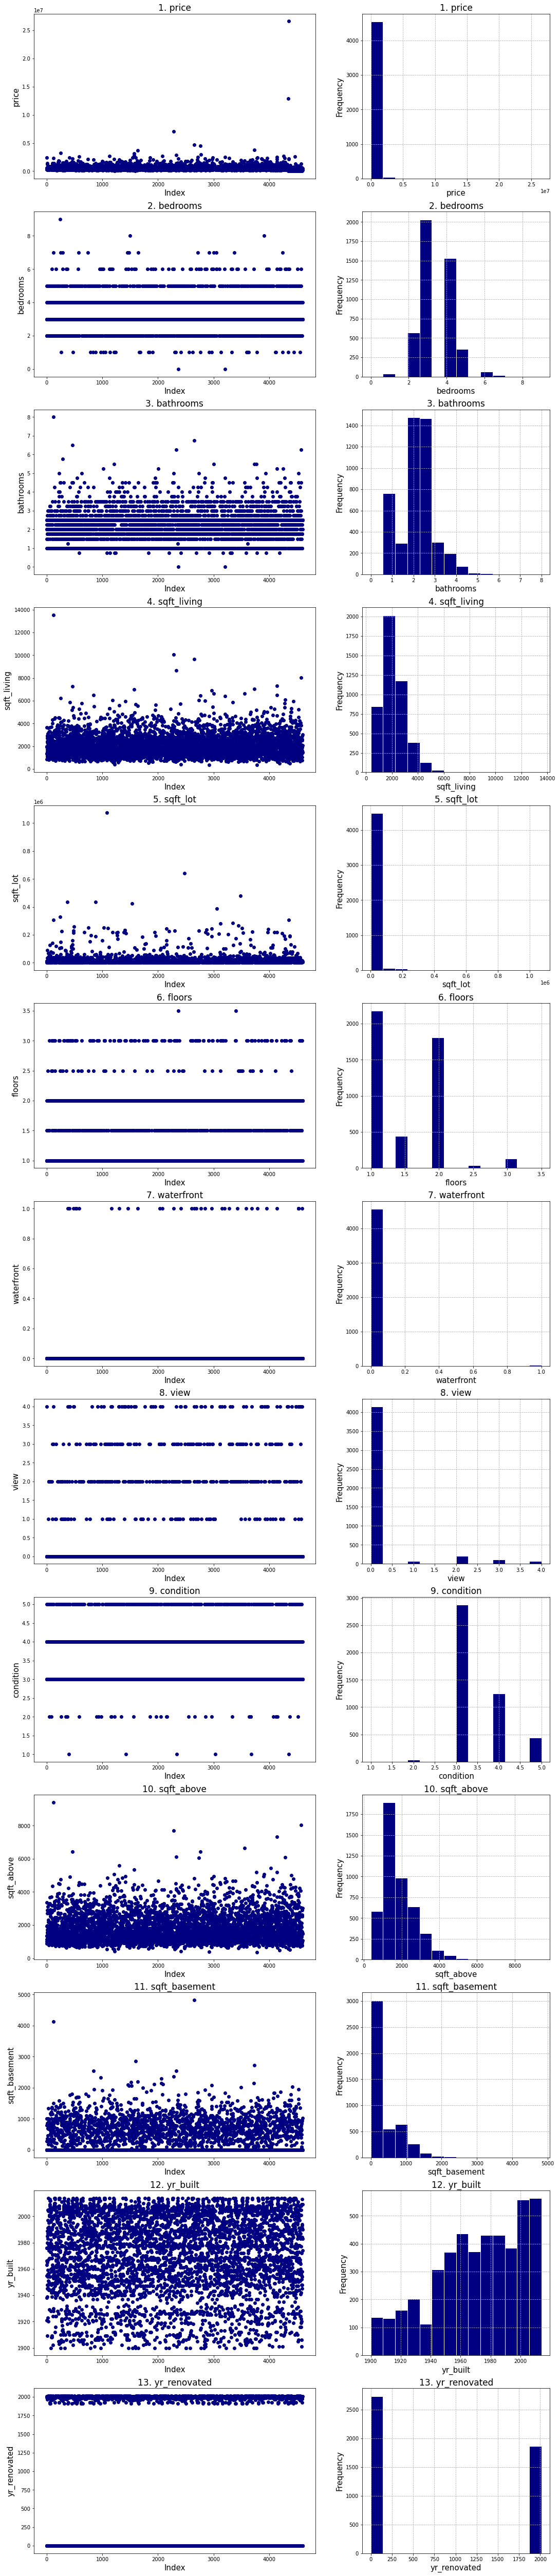

In [ ]:
df_temp = df.drop(['date', 'street','city','statezip','country'], axis=1)
univ_analysis(df_temp)
# df.hist(bins=bin_sturges(df))

<b><i>checking the univariate analysis, we can see that
<li>There are some outliers in price
<li> bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement also have some points deviating from the normal readings
<li>Almost all of the houses have waterfornt=0, only some have waterfont so we can drop this attribute later
<li>condition also has very few data for condition=1 or 2
<li>All of the houses are renovated between the years 1800 to 2100

<hr>

<li><b><i>As we can see from the histograms above, "price", "bedrooms", "bathrooms" "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement", "yr_renovated", "yr_built" are continous
   <li>"waterfront", "view" are binary(they represent category as well)
    <li>and attributes , "condition", "street", "city", "statezip", "country" are categorical
<li>However the bedrooms, bathrooms, yr_build, yr_renovated can also be considered as categorical because their values, values here for these columns implies some underlying mapping is done, to convert string values to numeric
<hr>
<b><i> Visualizing the Price attribute with square_feet, ideally this should be a positive correlation

Text(0, 0.5, 'Price')

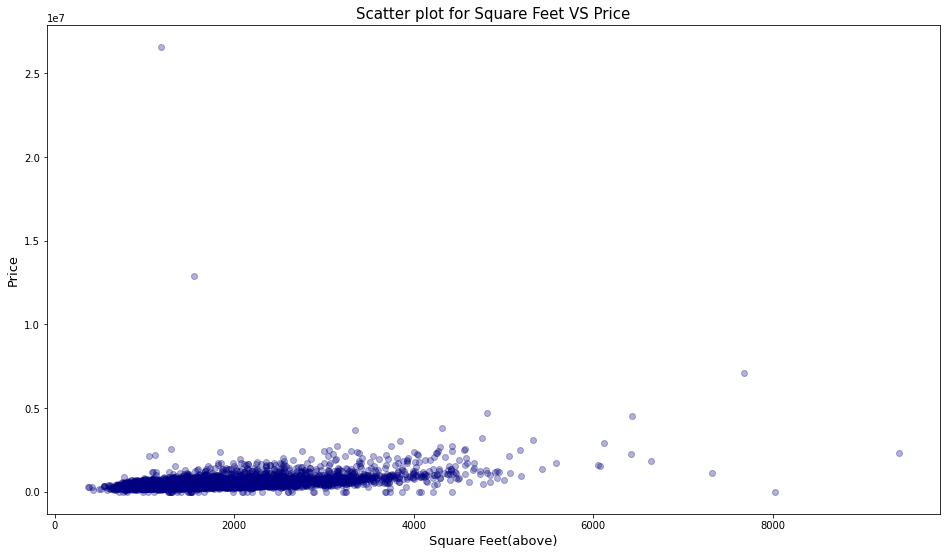

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df['sqft_above'], df['price'], alpha=0.3, color='navy')
plt.title('Scatter plot for Square Feet VS Price', fontsize=15)
ax.set_xlabel('Square Feet(above)', fontsize=13)
ax.set_ylabel('Price', fontsize=13)

<i><b>As we can visually see, there are some outliers here.<br>
    Lets try to remove them using the Inter Quantile Range. So special treatment is required for removing outliers.
<hr>

In [ ]:
# Function which returns a dictionary including iqr, fence values when given dataframe and column name
def give_fences(df, attr):
    
    stats = df[attr].describe()
    
    iqr = stats['75%']-stats['50%']
    # fences
    lower_outer = stats['25%'] - 3.0*iqr
    lower_inner = stats['25%'] - 1.5*iqr
    upper_inner = stats['75%'] + 1.5*iqr
    upper_outer = stats['75%'] + 3.0*iqr
    
    metrics = {'upper_outer_fence': upper_outer,
               'upper_inner_fence': upper_inner,
               'iqr': iqr,
               'lower_inner_fence': lower_inner,
               'lower_outer_fence': lower_outer}
    print(metrics,'\n')
    return metrics

metrics_price = give_fences(df, 'price')

{'upper_outer_fence': 1237019.6153845, 'upper_inner_fence': 945991.05769225, 'iqr': 194019.03846149996, 'lower_inner_fence': 31846.442307750054, 'lower_outer_fence': -259182.1153844999} 



<hr>
<i><b>Keeping the points which are above the lower fence(outer) and below the upper fence(outer)

In [ ]:
output_dataset = df[df['price']>=metrics_price['lower_outer_fence']]
df_filtered =  output_dataset[output_dataset['price']<=metrics_price['upper_outer_fence']]
df_filtered.shape

(4401, 18)

<hr>
<i><b>Lets plot the filtered data 

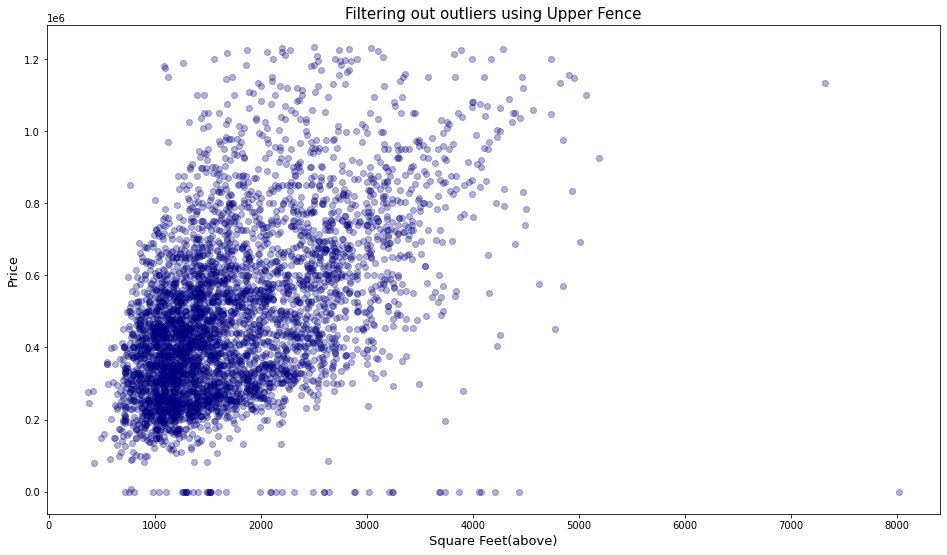

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df_filtered['sqft_above'], df_filtered['price'], alpha=0.3, color='navy')
plt.title('Filtering out outliers using Upper Fence', fontsize=15)
ax.set_xlabel('Square Feet(above)', fontsize=13)
ax.set_ylabel('Price', fontsize=13)
plt.show()

<i><b>There are some datapoints with price=0, which is unusual, lets checkout how many of them are there, special treatment again will be required here to drop the data that has price=0 since we are predicting the price, and price of a property should always be non-zero.
    <hr>
<i><b>Checking how many rows have price=0

In [ ]:
print(df_filtered[df_filtered['price'] == 0].shape)
df_filtered[df_filtered['price'] == 0].head(2)

(49, 18)


date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4354  2014-05-05 00:00:00    0.0       3.0       1.75         1490     10125   
4356  2014-05-05 00:00:00    0.0       4.0       2.75         2600      5390   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4354     1.0           0     0          4        1490              0   
4356     1.0           0     0          4        1300           1300   

      yr_built  yr_renovated           street         city  statezip country  
4354      1962             0  3911 S 328th St  Federal Way  WA 98001     USA  
4356      1960          2001  2120 31st Ave W      Seattle  WA 98199     USA

<hr>
<i><b>Filtering out points that are not in range of [lower fence(inner) to upper fence(inner)], and plotting the data

In [ ]:
output_dataset = df[df['price']>=metrics_price['lower_inner_fence']]
df_filtered_in =  output_dataset[output_dataset['price']<=metrics_price['upper_inner_fence']]
df_filtered_in.shape

(4140, 18)

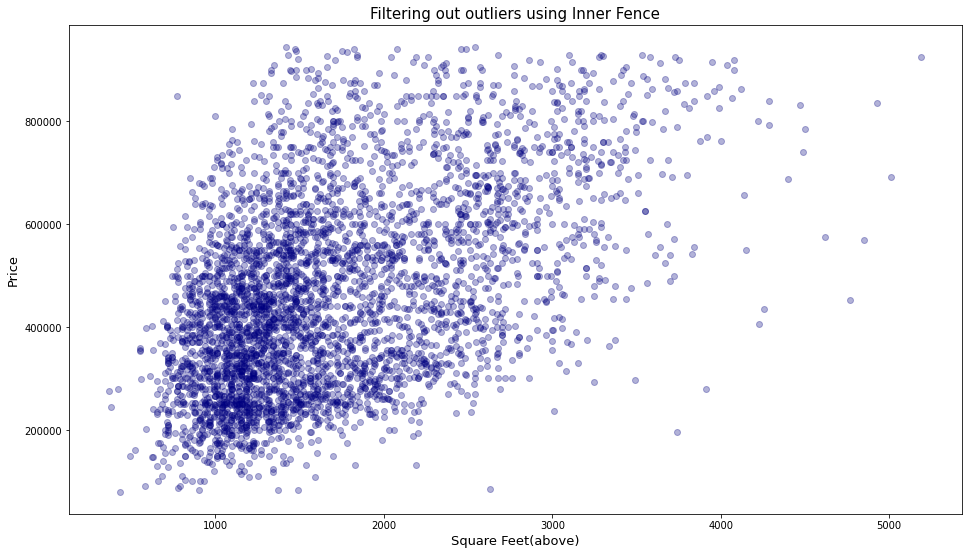

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df_filtered_in['sqft_above'], df_filtered_in['price'], alpha=0.3, color='navy')
plt.title('Filtering out outliers using Inner Fence', fontsize=15)
ax.set_xlabel('Square Feet(above)', fontsize=13)
ax.set_ylabel('Price', fontsize=13)
plt.show()

<i><b>By filtering out using inner fences, we are able to remove some more outliers and zero values for target attribute
<hr>

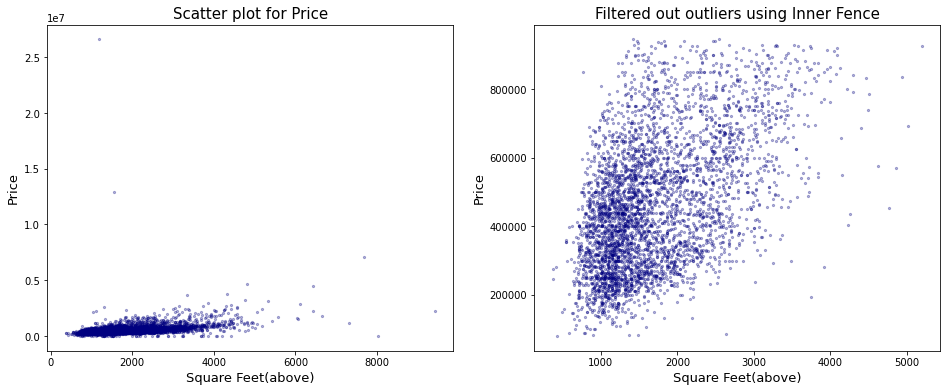

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(df['sqft_above'], df['price'], alpha=0.3, color='navy', s=5)
plt.title('Scatter plot for Price', fontsize=15)
plt.xlabel('Square Feet(above)', fontsize=13)
plt.ylabel('Price', fontsize=13)

plt.subplot(1,2,2)
plt.scatter(df_filtered_in['sqft_above'], df_filtered_in['price'], alpha=0.3, color='navy', s=5)
plt.title('Filtered out outliers using Inner Fence', fontsize=15)
plt.xlabel('Square Feet(above)', fontsize=13)
plt.ylabel('Price', fontsize=13)
plt.show()

### <hr>3.3 Visualize the dependency of target variable with each continous variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

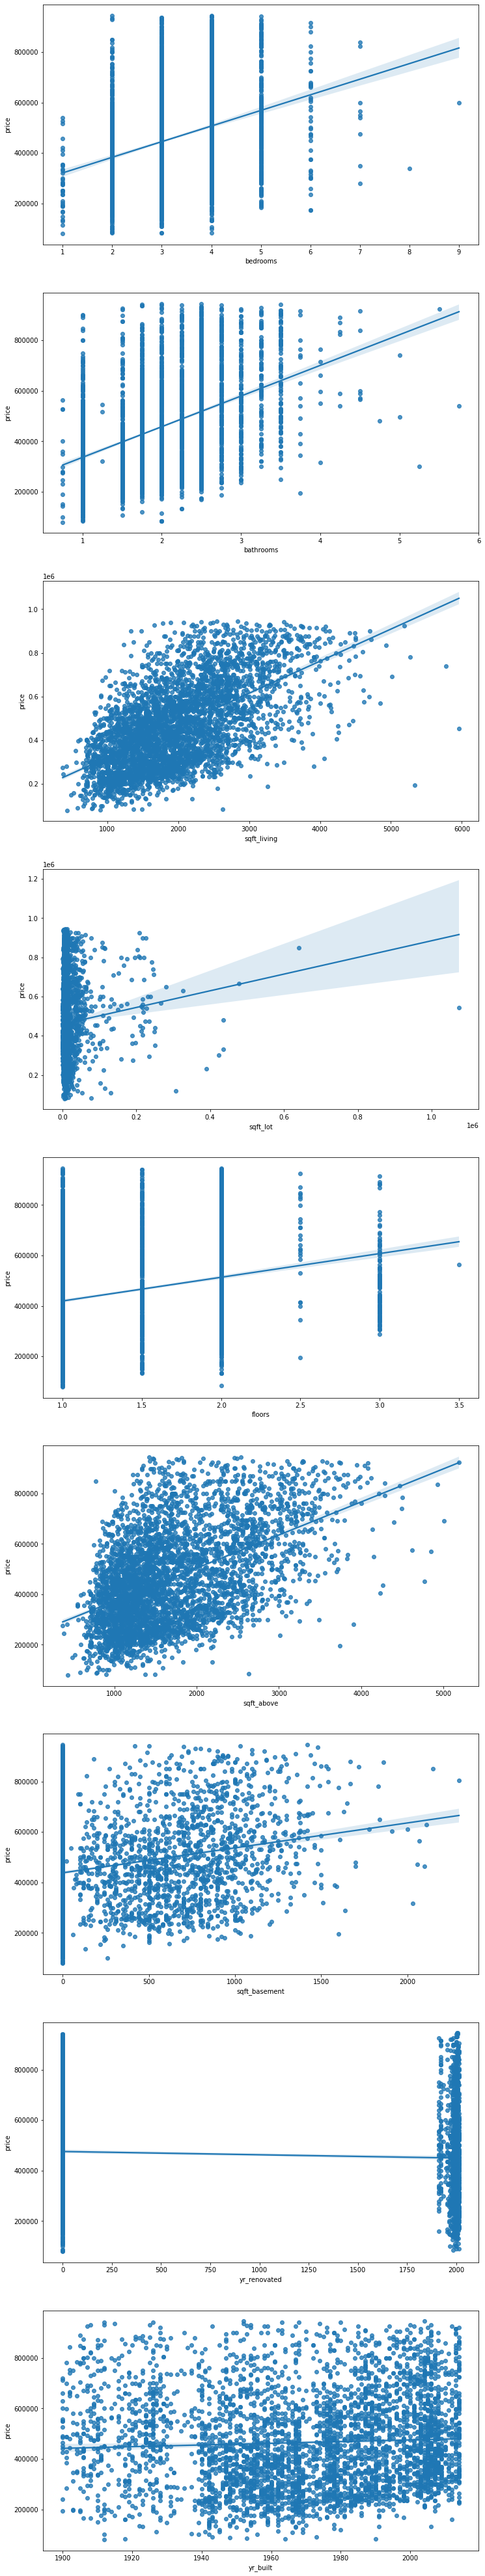

In [ ]:
# "price", "bedrooms", "bathrooms" "sqft_living", 
# "sqft_lot", "floors", "sqft_above", "sqft_basement", 
# "yr_renovated", "yr_built" are continous
cont=["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement", "yr_renovated", "yr_built"]
fg, ax = plt.subplots(9, figsize=(12,8*9))
for i in range(len(cont)):
    sns.regplot(df_filtered_in[cont[i]],df_filtered_in['price'], ax=ax[i])

### <hr>3.4 Modelling

<b><i><hr>
We can staraight away drop columns: date, street(since almost everyone has different street address) and country(all data is for one country without correlation test

In [ ]:
df_1 = df_filtered_in.drop(['date', 'street', 'country', 'statezip'], axis=1)
print(df_1.shape)
df_1.columns

(4140, 14)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

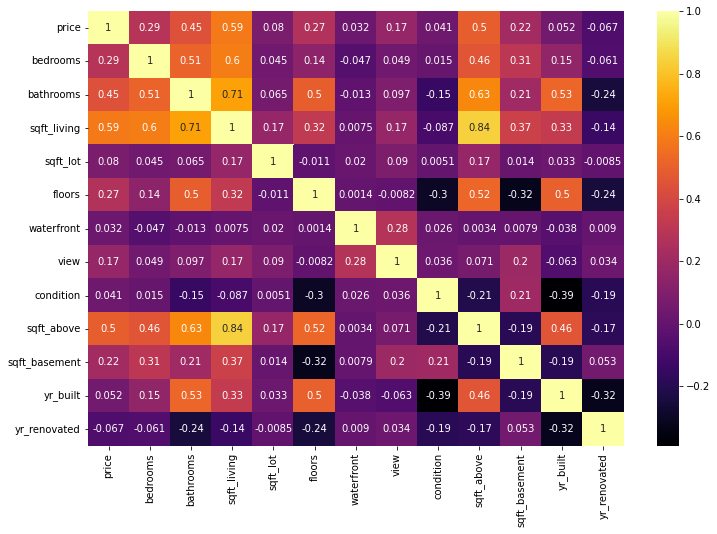

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(df_1.corr(), annot=True, cmap='inferno')

In [ ]:
# To sort correlation in descending order
corr = df_1.corr()
corr_list = []
for row, dic in corr.iteritems():
    cols = dic.keys()
    
    for i in range(len(cols)):
        corr_list.append([row,cols[i],dic[i]])
        
corr_dic = {}
for i in range(len(corr_list)):
    corr_dic[str(corr_list[i][:-1])]=corr_list[i][-1]
    
import operator
asc_dic = sorted(corr_dic.items(), key=operator.itemgetter(1))
desc_dic = sorted(corr_dic.items(), key=operator.itemgetter(1),reverse=True)
desc_dic

[("['price', 'price']", 1.0),
 ("['bedrooms', 'bedrooms']", 1.0),
 ("['bathrooms', 'bathrooms']", 1.0),
 ("['sqft_living', 'sqft_living']", 1.0),
 ("['sqft_lot', 'sqft_lot']", 1.0),
 ("['floors', 'floors']", 1.0),
 ("['waterfront', 'waterfront']", 1.0),
 ("['view', 'view']", 1.0),
 ("['condition', 'condition']", 1.0),
 ("['sqft_above', 'sqft_above']", 1.0),
 ("['sqft_basement', 'sqft_basement']", 1.0),
 ("['yr_built', 'yr_built']", 1.0),
 ("['yr_renovated', 'yr_renovated']", 1.0),
 ("['sqft_living', 'sqft_above']", 0.8448286651378537),
 ("['sqft_above', 'sqft_living']", 0.8448286651378537),
 ("['bathrooms', 'sqft_living']", 0.7101062020346477),
 ("['sqft_living', 'bathrooms']", 0.7101062020346477),
 ("['bathrooms', 'sqft_above']", 0.6306856529646304),
 ("['sqft_above', 'bathrooms']", 0.6306856529646304),
 ("['bedrooms', 'sqft_living']", 0.6016036630619993),
 ("['sqft_living', 'bedrooms']", 0.6016036630619993),
 ("['price', 'sqft_living']", 0.5888270698117651),
 ("['sqft_living', 'price

<ul><li><b><i>Price has significant correlation with bedroom, bathroom, sqft_living, floor, view, sqft_above and sqft basement<br>Hence these are not that important: sqft_lot, waterfront, condition, yr_built, yr_renovated because they have significantly low correlation
<li>['sqft_living', 'sqft_above']", 0.8448286651378537) has high correlation, hence we will drop sqft_above and transform sqft_basement such that if the sqft_basement==0 then 0, if sqft_basement>0 then 1 (basically convert the variable to categorical)
<hr>

In [ ]:
df_1.drop('sqft_above', axis=1, inplace=True)
df_1.shape

(4140, 13)

In [ ]:
df_1['basement'] = df_1['sqft_basement'].apply(lambda x: 1 if x >0 else 0)
df_1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  313000.0       3.0       1.50         1340      7912     1.5           0   
2  342000.0       3.0       2.00         1930     11947     1.0           0   
3  420000.0       3.0       2.25         2000      8030     1.0           0   
4  550000.0       4.0       2.50         1940     10500     1.0           0   
5  490000.0       2.0       1.00          880      6380     1.0           0   

   view  condition  sqft_basement  yr_built  yr_renovated       city  basement  
0     0          3              0      1955          2005  Shoreline         0  
2     0          4              0      1966             0       Kent         0  
3     0          4           1000      1963             0   Bellevue         1  
4     0          4            800      1976          1992    Redmond         1  
5     0          3              0      1938          1994    Seattle         0

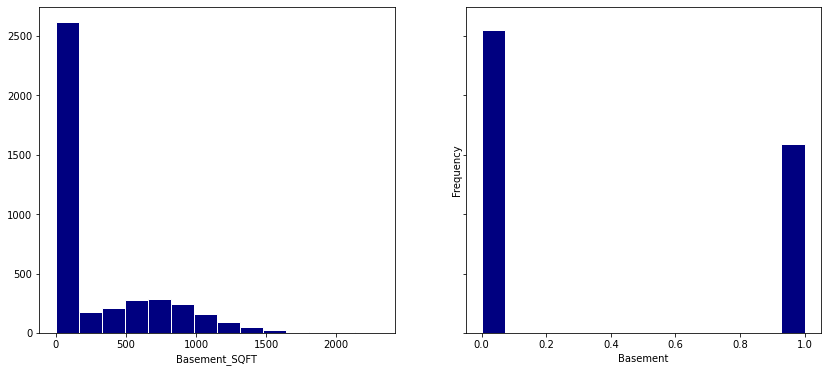

In [ ]:
def bin_sturges(df):
    return int(np.ceil(np.log2(df.shape[0])) + 1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)
''', gridspec_kw={'width_ratios':[1,1]}'''

ax1.hist(df_1['sqft_basement'], bins=bin_sturges(df), color='navy', edgecolor='white')
ax1.set_xlabel('Basement_SQFT')
ax2.hist(df_1['basement'], bins=bin_sturges(df), color='navy', edgecolor='white')
ax2.set_xlabel('Basement')
ax2.set_ylabel('Frequency')
plt.show()

<hr><b><i>Plotting again the univariate analysis of modified data

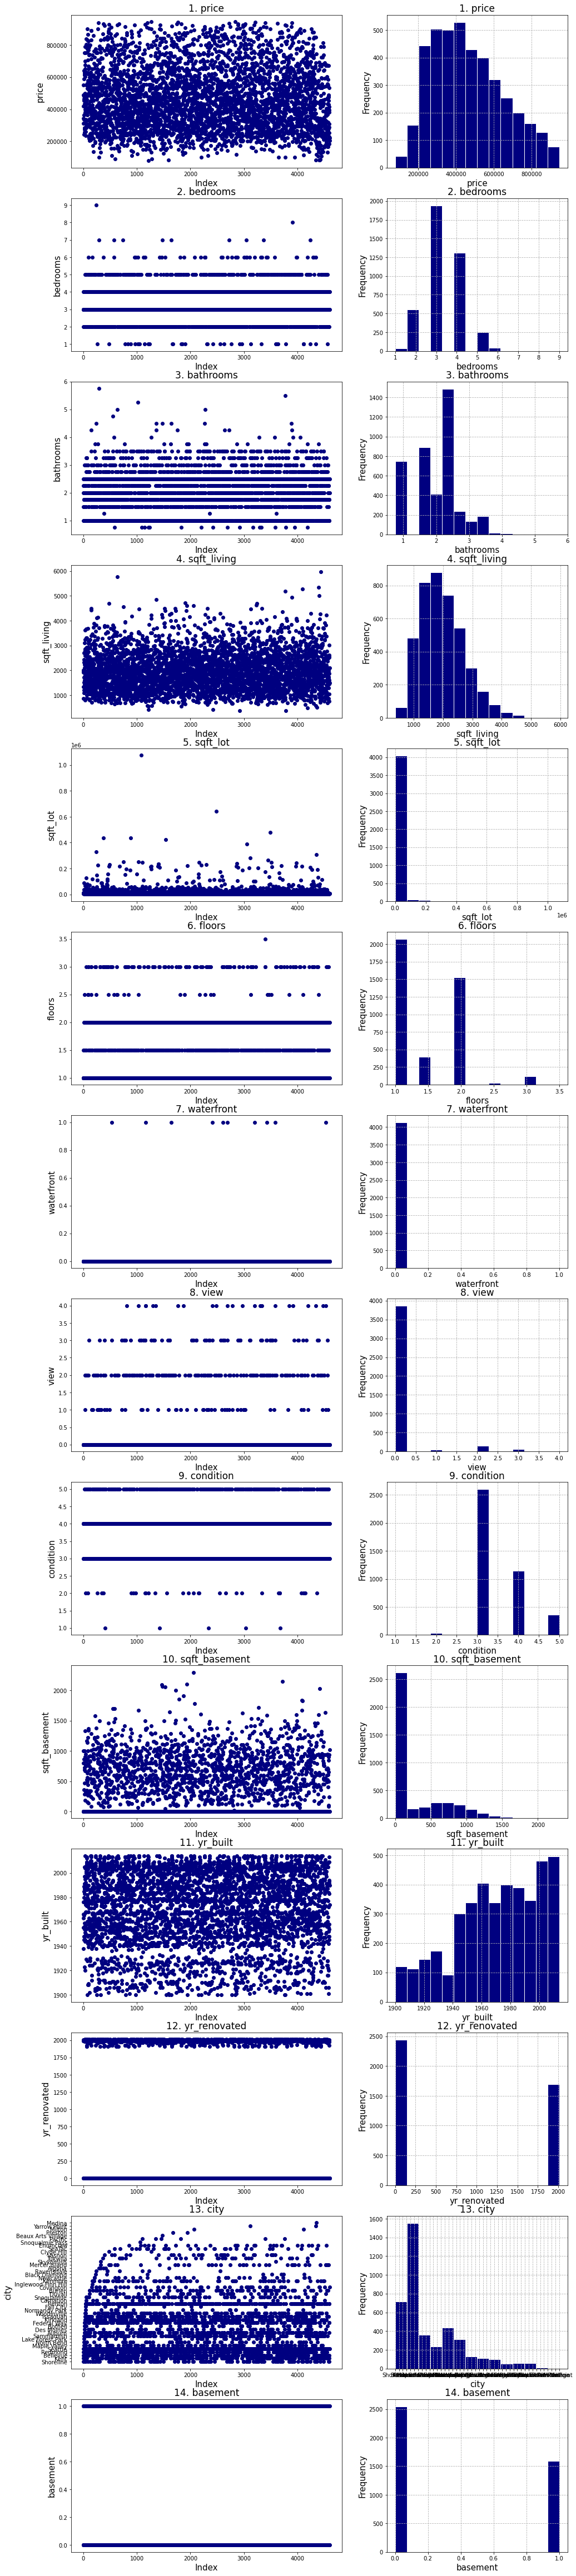

In [ ]:
univ_analysis(df_1)

<b><i><li>waterfront: need to drop this, since very few houses have waterfront also correlation with price is 0.03, so this parameter will unnecessarily add complexity to model.
    <li>yr_renovated: convert from continous to binary, because the houses are renovated mainly between 1900 and 2000 also the correlation is -0.06

In [ ]:
# dropping waterfornt and city and transforming yr_renovated
df_2 = df_1.drop(['waterfront','city'], axis=1)
df_2['renovated'] = df_2['yr_renovated'].apply(lambda x: 1 if x >0 else 0)
df_2.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  313000.0       3.0       1.50         1340      7912     1.5     0   
2  342000.0       3.0       2.00         1930     11947     1.0     0   
3  420000.0       3.0       2.25         2000      8030     1.0     0   
4  550000.0       4.0       2.50         1940     10500     1.0     0   
5  490000.0       2.0       1.00          880      6380     1.0     0   

   condition  sqft_basement  yr_built  yr_renovated  basement  renovated  
0          3              0      1955          2005         0          1  
2          4              0      1966             0         0          0  
3          4           1000      1963             0         1          0  
4          4            800      1976          1992         1          1  
5          3              0      1938          1994         0          1

In [ ]:
# remove more unnecessary columns
df_3 = df_2.drop(['yr_renovated','sqft_basement'], axis=1)
print(df_3.shape)
df_3.head()

(4140, 11)


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  313000.0       3.0       1.50         1340      7912     1.5     0   
2  342000.0       3.0       2.00         1930     11947     1.0     0   
3  420000.0       3.0       2.25         2000      8030     1.0     0   
4  550000.0       4.0       2.50         1940     10500     1.0     0   
5  490000.0       2.0       1.00          880      6380     1.0     0   

   condition  yr_built  basement  renovated  
0          3      1955         0          1  
2          4      1966         0          0  
3          4      1963         1          0  
4          4      1976         1          1  
5          3      1938         0          1

In [ ]:
X = df_3.drop(['price'],axis=1)
Y = df_3['price']
print(X.shape)
print(Y.shape)

(4140, 10)
(4140,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3312, 10) (3312,)
(828, 10) (828,)


In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, Y_train)
test_acc = model_lr.score(X_test, Y_test)
print('Linear regression test acc: {:.2f}'.format(test_acc))

Linear regression test acc: 0.44


<i><b><hr> The accuracy is very bad, I think this would be because I removed some of the columns, or due to column transformations(for yr_renovated or sqft_basement), lets add the 'city' column back and check the results again

In [ ]:
df_2 = df_1.copy()
df_2['renovated'] = df_2['yr_renovated'].apply(lambda x: 1 if x >0 else 0)

# OneHot encoding the city data
city_encoded = pd.get_dummies(df_2['city'], prefix='city')
df_3 = pd.concat([df_2, city_encoded], axis=1)

# dropping unnecessary data
df_3.drop(['waterfront','yr_renovated','sqft_basement', 'city'], axis=1, inplace=True)
df_3.shape
df_3.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  313000.0       3.0       1.50         1340      7912     1.5     0   
2  342000.0       3.0       2.00         1930     11947     1.0     0   
3  420000.0       3.0       2.25         2000      8030     1.0     0   
4  550000.0       4.0       2.50         1940     10500     1.0     0   
5  490000.0       2.0       1.00          880      6380     1.0     0   

   condition  yr_built  basement  ...  city_SeaTac  city_Seattle  \
0          3      1955         0  ...            0             0   
2          4      1966         0  ...            0             0   
3          4      1963         1  ...            0             0   
4          4      1976         1  ...            0             0   
5          3      1938         0  ...            0             1   

   city_Shoreline  city_Skykomish  city_Snoqualmie  city_Snoqualmie Pass  \
0               1               0                0                     0   
2               0               0                0                     0   
3               0               0                0                     0   
4               0               0                0                     0   
5               0               0                0                     0   

   city_Tukwila  city_Vashon  city_Woodinville  city_Yarrow Point  
0             0            0                 0                  0  
2             0            0                 0                  0  
3             0            0                 0                  0  
4             0            0                 0                  0  
5             0            0                 0                  0  

[5 rows x 55 columns]

In [ ]:
X = df_3.drop(['price'],axis=1)
Y = df_3['price']
print(X.shape)
print(Y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4140, 54)
(4140,)
(3312, 54) (3312,)
(828, 54) (828,)


#### <i><hr> Linear, Lasso, Ridge Regression; ElasticNet

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
model_lr = LinearRegression().fit(X_train, Y_train)
test_acc = model_lr.score(X_test, Y_test)
print('without standard scalling')
print('Linear regression test score: {:.2f}'.format(test_acc))

model_lasso = Lasso()
model_lasso.fit(X_train, Y_train)
test_acc = model_lasso.score(X_test, Y_test)
print('Lasso regression test score: {:.2f}'.format(test_acc))

model_ridge = Ridge()
model_ridge.fit(X_train, Y_train)
test_acc = model_ridge.score(X_test, Y_test)
print('Ridge regression test score: {:.2f}'.format(test_acc))

model_elnet = ElasticNet()
model_elnet.fit(X_train, Y_train)
print('ElasticNet test score: {:.2f}'.format(test_acc))

without standard scalling
Linear regression test score: 0.65
Lasso regression test score: 0.65
Ridge regression test acc: 0.65
ElasticNet test acc: 0.65


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.460e+12, tolerance: 1.187e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


<i><b> Adding back the city column increases the accuracy by 20%, i.e 50% more score than without it. So, we will keep the city column
<hr>
<i><b>Cross Validation Scores

In [ ]:
from sklearn.model_selection import cross_val_score
print('Cross Val Scores for Linear Regression')
print(cross_val_score(model_lr, X_train, Y_train))
print('\nCross Val Scores for Lasso Regression')
print(cross_val_score(model_lasso, X_train, Y_train))
print('\nCross Val Scores for Ridge Regression')
print(cross_val_score(model_ridge, X_train, Y_train))
print('\nCross Val Scores for ElasticNet')
print(cross_val_score(model_elnet, X_train, Y_train))

Cross Val Scores for Linear Regression
[0.67390918 0.66886998 0.66774515 0.64303758 0.59692048]

Cross Val Scores for Lasso Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.702e+12, tolerance: 9.525e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+12, tolerance: 9.349e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[0.6740123  0.66890889 0.66798671 0.64328045 0.59797921]

Cross Val Scores for Ridge Regression
[0.67330017 0.66928816 0.68668524 0.65951046 0.59767162]

Cross Val Scores for ElasticNet
[0.444457   0.46602184 0.46921651 0.42453387 0.3973089 ]


<b><i> Testing wether Standard Scaling the data improves the results<hr>

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_scaled = std.fit_transform(df_3.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df_3.columns)
df_scaled.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors      view  \
0 -0.807310 -0.375229  -0.812688    -0.842150 -0.175576  0.029217 -0.252256   
1 -0.653525 -0.375229  -0.089988    -0.062558 -0.062220 -0.901246 -0.252256   
2 -0.239897 -0.375229   0.271361     0.029936 -0.172261 -0.901246 -0.252256   
3  0.449485  0.772074   0.632711    -0.049344 -0.102871 -0.901246 -0.252256   
4  0.131309 -1.522532  -1.535387    -1.449968 -0.218615 -0.901246 -0.252256   

   condition  yr_built  basement  ...  city_SeaTac  city_Seattle  \
0  -0.663247 -0.533063 -0.791252  ...    -0.082519     -0.718281   
1   0.838855 -0.159027 -0.791252  ...    -0.082519     -0.718281   
2   0.838855 -0.261037  1.263819  ...    -0.082519     -0.718281   
3   0.838855  0.181006  1.263819  ...    -0.082519     -0.718281   
4  -0.663247 -1.111120 -0.791252  ...    -0.082519      1.392212   

   city_Shoreline  city_Skykomish  city_Snoqualmie  city_Snoqualmie Pass  \
0        5.812909       -0.026929        -0.128257             -0.015544   
1       -0.172031       -0.026929        -0.128257             -0.015544   
2       -0.172031       -0.026929        -0.128257             -0.015544   
3       -0.172031       -0.026929        -0.128257             -0.015544   
4       -0.172031       -0.026929        -0.128257             -0.015544   

   city_Tukwila  city_Vashon  city_Woodinville  city_Yarrow Point  
0     -0.081022     -0.08399         -0.160524          -0.021985  
1     -0.081022     -0.08399         -0.160524          -0.021985  
2     -0.081022     -0.08399         -0.160524          -0.021985  
3     -0.081022     -0.08399         -0.160524          -0.021985  
4     -0.081022     -0.08399         -0.160524          -0.021985  

[5 rows x 55 columns]

In [ ]:
X = df_3.drop(['price'],axis=1)
Y = df_3['price']
print(X.shape)
print(Y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
model_lr = LinearRegression().fit(X_train, Y_train)
test_acc = model_lr.score(X_test, Y_test)
print('With standard scalling')
print('Linear regression test score: {:.2f}'.format(test_acc))

model_lasso = Lasso()
model_lasso.fit(X_train, Y_train)
test_acc = model_lasso.score(X_test, Y_test)
print('Lasso regression test score: {:.2f}'.format(test_acc))

model_ridge = Ridge()
model_ridge.fit(X_train, Y_train)
test_acc = model_ridge.score(X_test, Y_test)
print('Ridge regression test acc: {:.2f}'.format(test_acc))

model_elnet = ElasticNet()
model_elnet.fit(X_train, Y_train)
print('ElasticNet test acc: {:.2f}'.format(test_acc))

(4140, 54)
(4140,)
(3312, 54) (3312,)
(828, 54) (828,)
With standard scalling
Linear regression test score: 0.65
Lasso regression test score: 0.65
Ridge regression test acc: 0.65
ElasticNet test acc: 0.65


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.460e+12, tolerance: 1.187e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
from sklearn.model_selection import cross_val_score
print('Cross Val Scores for Linear Regression')
print(cross_val_score(model_lr, X_train, Y_train))
print('\nCross Val Scores for Lasso Regression')
print(cross_val_score(model_lasso, X_train, Y_train))
print('\nCross Val Scores for Ridge Regression')
print(cross_val_score(model_ridge, X_train, Y_train))
print('\nCross Val Scores for ElasticNet')
print(cross_val_score(model_elnet, X_train, Y_train))

Cross Val Scores for Linear Regression
[0.67390918 0.66886998 0.66774515 0.64303758 0.59692048]

Cross Val Scores for Lasso Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.702e+12, tolerance: 9.525e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+12, tolerance: 9.349e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[0.6740123  0.66890889 0.66798671 0.64328045 0.59797921]

Cross Val Scores for Ridge Regression
[0.67330017 0.66928816 0.68668524 0.65951046 0.59767162]

Cross Val Scores for ElasticNet
[0.444457   0.46602184 0.46921651 0.42453387 0.3973089 ]


<b><i>Scores after Standard Scaling are idelntical to that without Standardization<hr>

## Question 4

### Question 4.1 Determine if features are continuous or categorical

In [ ]:
from scipy.io.arff import loadarff
datapath4 = r'/content/drive/MyDrive/mac_gdrive/P556 AMLearning/notebooks/Group HW 1/credit.arff'
credit_raw = loadarff(datapath4)
credit = pd.DataFrame(credit_raw[0])

credit_columns = credit.columns

for i in credit_columns:
  print(i)
  print(credit[i].value_counts(),'\n')

#continuous: credit_amount, age, duration,installment_commitment, residence_since, existing_credits, num_dependents,

#categorical: checking_status, credit_history, purpose, job, savings_status, employment, personal_status,other_parties,property_magnitude,other_payment_plans,housing, own_telephone,foreign_worker, class


checking_status
b'no checking'    394
b'<0'             274
b'0<=X<200'       269
b'>=200'           63
Name: checking_status, dtype: int64 

duration
24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
60.0     13
27.0     13
42.0     11
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
47.0      1
5.0       1
26.0      1
72.0      1
40.0      1
Name: duration, dtype: int64 

credit_history
b'existing paid'                     530
b'critical/other existing credit'    293
b'delayed previously'                 88
b'all paid'                           49
b'no credits/all paid'                40
Name: credit_history, dtype: int64 

purpose
b'radio/tv'               280
b'new car'                234
b'furniture/equipment'    181
b'used car'               103
b'business'                97
b'educa

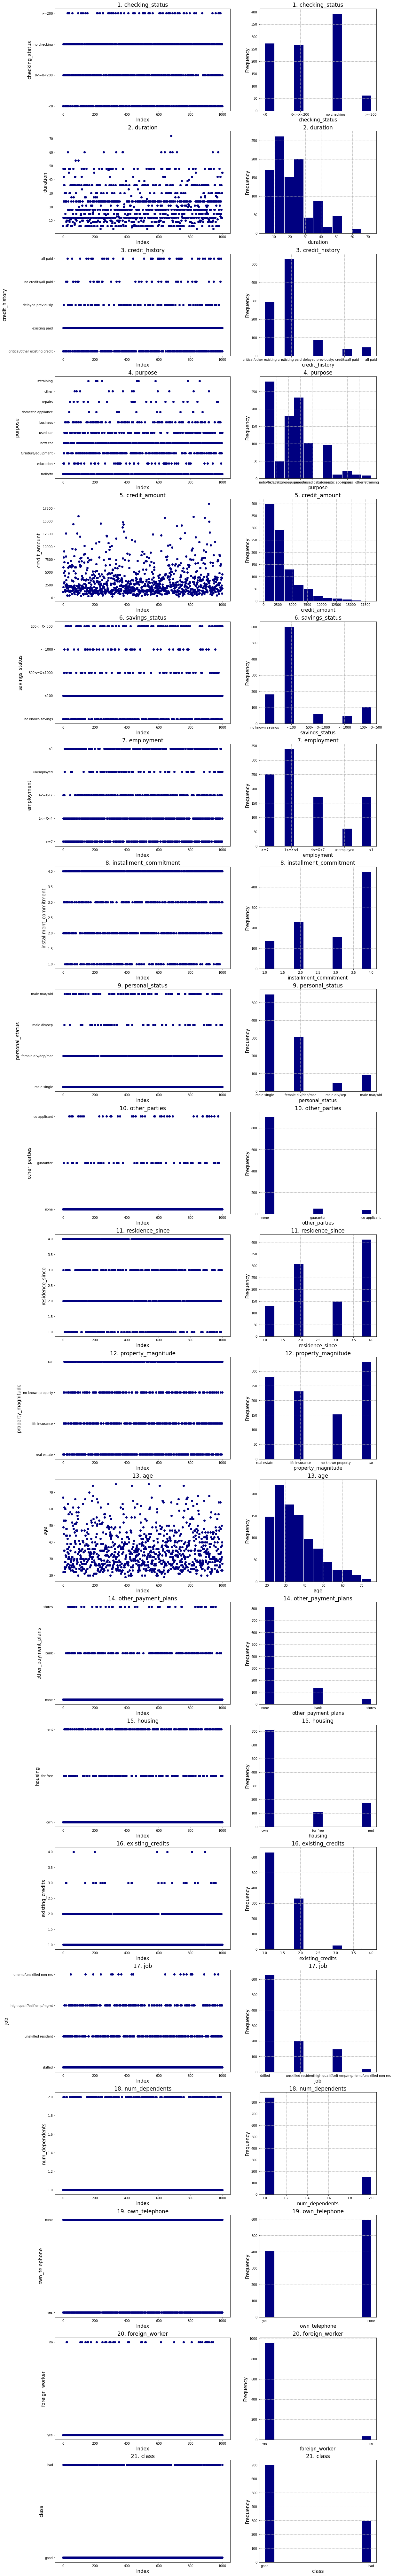

In [ ]:
univ_analysis(credit)

<i><b>Continuous variables: credit_amount, age, duration,installment_commitment, residence_since, existing_credits, num_dependents

Categorical variables: checking_status, credit_history, purpose, job, savings_status, employment, personal_status,other_parties,property_magnitude,other_payment_plans,housing, own_telephone,foreign_worker, class
<hr>

### 4.2 Visualize the univariate distribution of each continuous feature and target

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


Text(0, 0.5, 'Frequency')

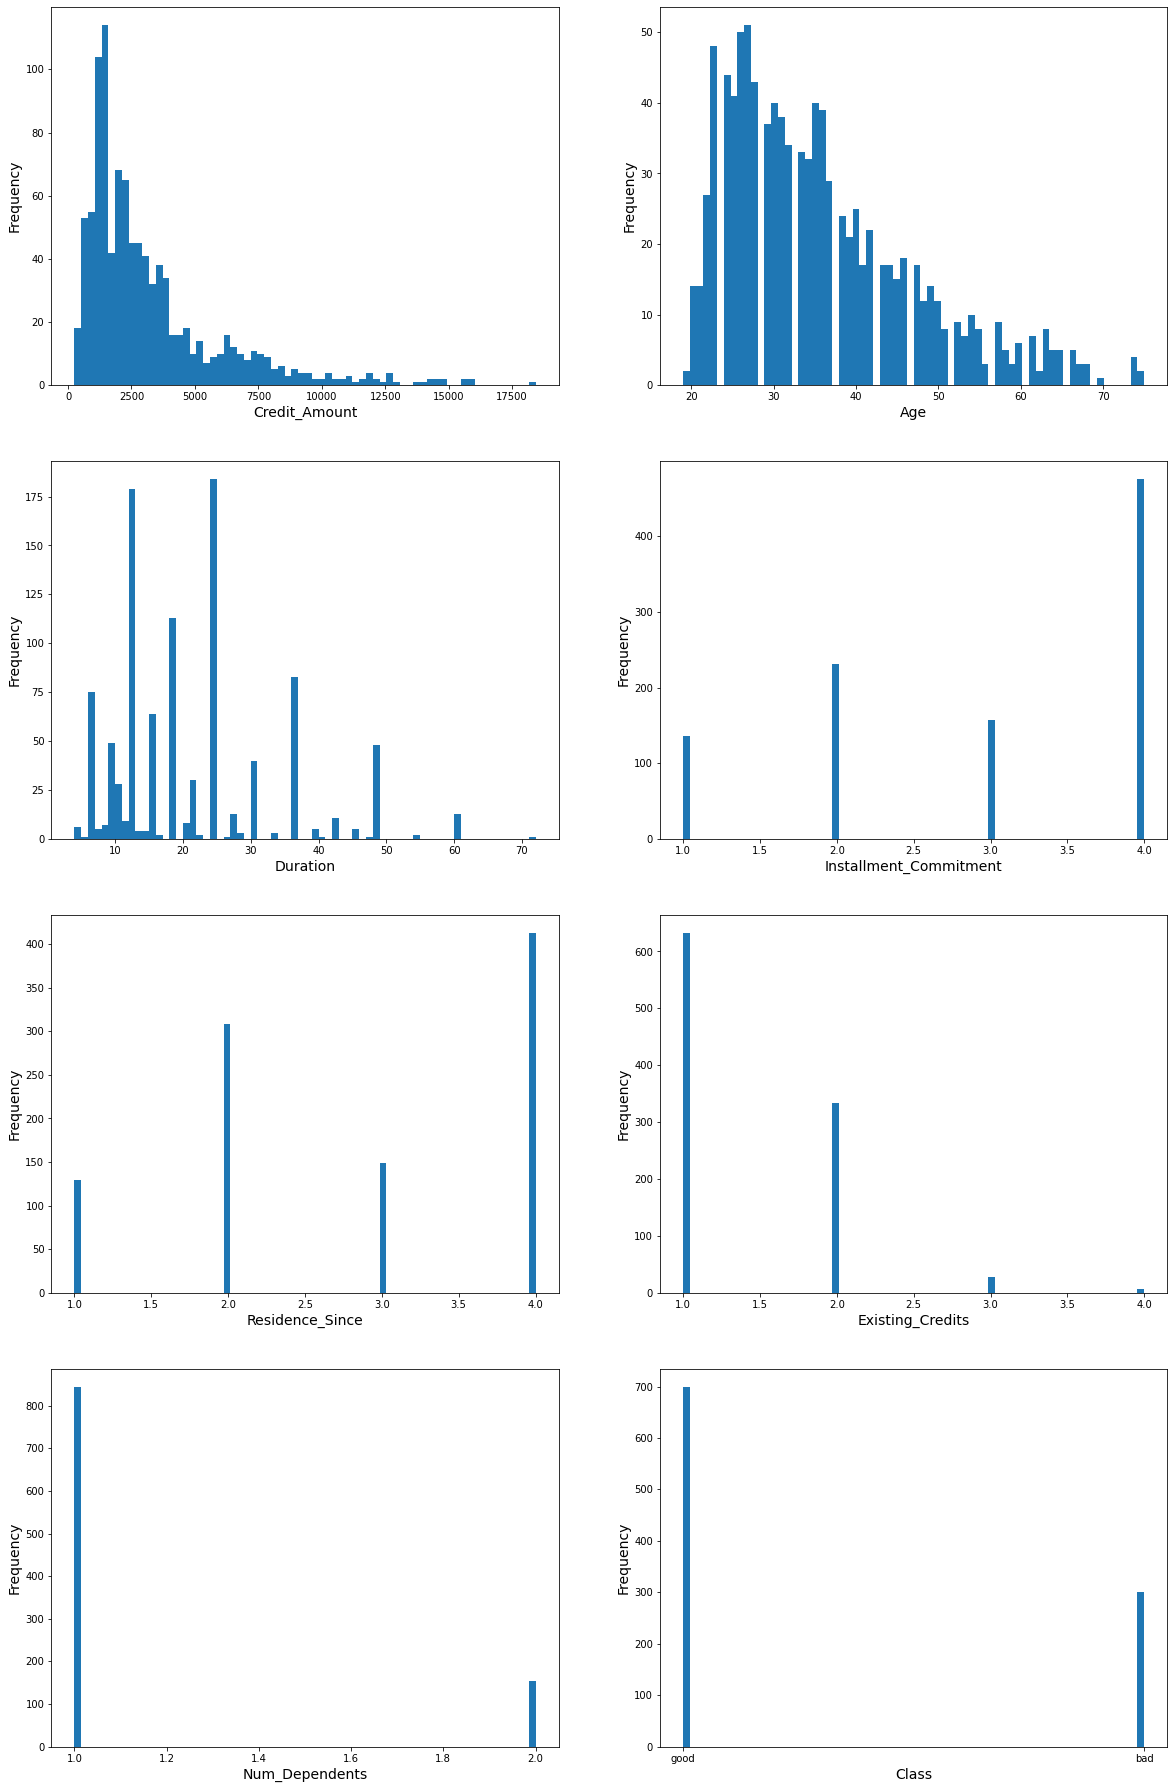

In [ ]:
from sklearn.model_selection import train_test_split

print(credit_columns)

#continuous: credit_amount, age, duration,installment_commitment, residence_since, existing_credits, num_dependents,

fig, graph = plt.subplots(4,2, figsize=(20,32))
graph[0,0].hist(credit['credit_amount'],68)
graph[0,0].set_xlabel("Credit_Amount", size=14)
graph[0,0].set_ylabel("Frequency", size=14)
graph[0,1].hist(credit['age'],68)
graph[0,1].set_xlabel("Age", size=14)
graph[0,1].set_ylabel("Frequency", size=14)
graph[1,0].hist(credit['duration'],68)
graph[1,0].set_xlabel("Duration", size=14)
graph[1,0].set_ylabel("Frequency", size=14)
graph[1,1].hist(credit['installment_commitment'],68)
graph[1,1].set_xlabel("Installment_Commitment", size=14)
graph[1,1].set_ylabel("Frequency", size=14)
graph[2,0].hist(credit['residence_since'],68)
graph[2,0].set_xlabel("Residence_Since", size=14)
graph[2,0].set_ylabel("Frequency", size=14)
graph[2,1].hist(credit['existing_credits'],68)
graph[2,1].set_xlabel("Existing_Credits", size=14)
graph[2,1].set_ylabel("Frequency", size=14)
graph[3,0].hist(credit['num_dependents'],68)
graph[3,0].set_xlabel("Num_Dependents", size=14)
graph[3,0].set_ylabel("Frequency", size=14)
graph[3,1].hist(credit['class'],68)
graph[3,1].set_xlabel("Class", size=14)
graph[3,1].set_ylabel("Frequency", size=14)

### 4.3 Split data into train/test, preprocess, and evaluate the models with train/valid split

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#categorical features are one hot encoded and have their own column
#categorical: (checking status OHE, credit_history OHE, purpose OHE, job OHE, savings_status OHE, employment OHE, personal_status OHE,other_parties OHE,property_magnitude OHE,other_payment_plans OHE,housing OHE, own_telephone OHE,foreign_worker OHE, class OHE)

#encode categorical variables 
#continuous: credit_amount, age, duration,installment_commitment, residence_since, existing_credits, num_dependents,

num_variables_train = ['credit_amount','age','duration','installment_commitment','residence_since','existing_credits','num_dependents']
cat_variables_train = ['checking_status','credit_history','purpose','job','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','own_telephone','foreign_worker']
cat_variables_test = ['class']

ct_train = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), cat_variables_train)])

ct_test = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), cat_variables_test)])

credit_features = credit.drop("class", axis=1)

print(credit_features.shape) #(1000,20)
train_x, test_x, train_y, test_y = train_test_split(credit_features, credit['class'], random_state=0, test_size=0.2) 
print("train x",train_x.shape) #(800,20)
print("test_x",test_x.shape) #(200,20)
print("train y", train_y.shape) #(800,)
print("test_y", test_y.shape) #(200,)

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, random_state=0, test_size=0.2)
print("train_x",train_x.shape)  #(640,20)
print("train_y", train_y.shape) #(640,)
print("valid_x",valid_x.shape) #(160,20)
print("valid_y",valid_y.shape) #(160,)

#encoded train_x (640,54)
ct_train.fit(train_x)
train_x = ct_train.transform(train_x)
print("encoded", train_x.shape)

#encoded valid_x (160,54)
ct_train.fit(valid_x)
valid_x = ct_train.transform(valid_x)
print("encoded",valid_x.shape)

#encoded test_x (200,54)
ct_train.fit(test_x)
test_x = ct_train.transform(test_x)
print("encoded",test_x.shape)

#encoded train_y (640,)
label_enc = preprocessing.LabelEncoder()
train_y = label_enc.fit_transform(train_y)

#encoded valid_y (160,)
valid_y = label_enc.fit_transform(valid_y)

#encoded test_y (200,)
test_y = label_enc.fit_transform(test_y)

log_reg = LogisticRegression()
log_reg.fit(train_x,train_y)

print("Validation score w Logistic Regression: {:.3f}".format(log_reg.score(valid_x, valid_y)))


(1000, 20)
train x (800, 20)
test_x (200, 20)
train y (800,)
test_y (200,)
train_x (640, 20)
train_y (640,)
valid_x (160, 20)
valid_y (160,)
encoded (640, 54)
encoded (160, 54)
encoded (200, 54)
Validation score w Logistic Regression: 0.756


In [ ]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(train_x,train_y)
print("Validation score w LinearSVC: {:.3f}".format(linear_svc.score(valid_x, valid_y)))

Validation score w LinearSVC: 0.738


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
print("Validation score w KNN: {:.3f}".format(knn.score(valid_x, valid_y)))

Validation score w KNN: 0.694


In [ ]:
#Results on Credit Classification (No scaling on continuous variables)
print("Validation score w Logistic Regression: {:.3f}".format(log_reg.score(valid_x, valid_y)))
print("Validation score w LinearSVC: {:.3f}".format(linear_svc.score(valid_x, valid_y)))
print("Validation score w KNN: {:.3f}".format(knn.score(valid_x, valid_y)))
print("Test score w Logistic Regression: {:.3f}".format(log_reg.score(test_x, test_y)))
print("Test score w LinearSVC: {:.3f}".format(linear_svc.score(test_x, test_y)))
print("Test score w KNN: {:.3f}".format(knn.score(test_x, test_y)))

Validation score w Logistic Regression: 0.756
Validation score w LinearSVC: 0.738
Validation score w KNN: 0.694
Test score w Logistic Regression: 0.720
Test score w LinearSVC: 0.705
Test score w KNN: 0.690


<i><b>Evaluating the models with no scaling on the continuous variables, it is clear that Logistic Regression had the best performance for the validation and test run. 
Linear SVM was the 2nd best model, while K Nearest Neighbor had the worst performance. 
<hr>

### 4.4 Evaluating models with StandardScaler

In [ ]:
ct_train_num = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), cat_variables_train),
        ('scaler', StandardScaler(), num_variables_train)])    

ct_test = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), cat_variables_test)])

train_x_num, test_x_num, train_y_num, test_y_num = train_test_split(credit_features, credit['class'], random_state=0, test_size=0.2) 
print("train x",train_x_num.shape) #(800,20)
print("test_x",test_x_num.shape) #(200,20)
print("train y", train_y_num.shape) #(800,)
print("test_y", test_y_num.shape) #(200,)

train_x_num, valid_x_num, train_y_num, valid_y_num = train_test_split(train_x_num, train_y_num, random_state=0, test_size=0.2)
print("train_x",train_x_num.shape)  #(640,20)
print("train_y", train_y_num.shape) #(640,)
print("valid_x",valid_x_num.shape) #(160,20)
print("valid_y",valid_y_num.shape) #(160,)

#encoded train_x (640,54)
ct_train_num.fit(train_x_num)
train_x_num = ct_train_num.transform(train_x_num)
print("encoded", train_x_num.shape)

#encoded valid_x (160,54)
ct_train_num.fit(valid_x_num)
valid_x_num = ct_train_num.transform(valid_x_num)
print("encoded",valid_x_num.shape)

#encoded test_x (200,54)
ct_train_num.fit(test_x_num)
test_x_num = ct_train_num.transform(test_x_num)
print("encoded",test_x_num.shape)

#encoded train_y (640,)
label_enc = preprocessing.LabelEncoder()
train_y = label_enc.fit_transform(train_y)

#encoded valid_y (160,)
valid_y = label_enc.fit_transform(valid_y)

#encoded test_y (200,)
test_y = label_enc.fit_transform(test_y)

log_reg.fit(train_x_num,train_y)
linear_svc.fit(train_x_num,train_y)
knn.fit(train_x_num,train_y)

train x (800, 20)
test_x (200, 20)
train y (800,)
test_y (200,)
train_x (640, 20)
train_y (640,)
valid_x (160, 20)
valid_y (160,)
encoded (640, 61)
encoded (160, 61)
encoded (200, 61)


KNeighborsClassifier()

In [ ]:
#Results on Credit Classification (Scaling on continuous variables included)
print("Validation score w Logistic Regression: {:.3f}".format(log_reg.score(valid_x_num, valid_y)))
print("Validation score w LinearSVC: {:.3f}".format(linear_svc.score(valid_x_num, valid_y)))
print("Validation score w KNN: {:.3f}".format(knn.score(valid_x_num, valid_y)))
print("Test score w Logistic Regression: {:.3f}".format(log_reg.score(test_x_num, test_y)))
print("Test score w LinearSVC: {:.3f}".format(linear_svc.score(test_x_num, test_y)))
print("Test score w KNN: {:.3f}".format(knn.score(test_x_num, test_y)))

Validation score w Logistic Regression: 0.744
Validation score w LinearSVC: 0.738
Validation score w KNN: 0.744
Test score w Logistic Regression: 0.760
Test score w LinearSVC: 0.735
Test score w KNN: 0.745


<i><b>Cross Validation<hr>

In [131]:
from sklearn.model_selection import cross_val_score
print('Logistic Regression')
cv = cross_val_score(log_reg, train_x_num, train_y)
print(cv, '| avg = ', np.mean(cv))
print('\nLinear SVC')
cv=cross_val_score(linear_svc, train_x_num, train_y)
print(cv, '| avg = ', np.mean(cv))
print('\nKNN')
cv=cross_val_score(knn, train_x_num, train_y)
print(cv, '| avg = ', np.mean(cv))

Logistic Regression
[0.6953125 0.765625  0.7421875 0.7734375 0.7265625] | avg =  0.740625

Linear SVC
[0.7109375 0.765625  0.7734375 0.7734375 0.7265625] | avg =  0.75

KNN
[0.671875  0.7421875 0.7734375 0.7265625 0.765625 ] | avg =  0.7359375


<i><b>Evaluating the models with continuous variables scaled led to improved test performances across the board for all models.
This was expected as allowing the data to fall into a gaussian distribution is easier to learn from. 
In terms of performance, Logistic regression still had the best performance, KNN had the 2nd best performance, and Linear SVC has the worst performance.
This ranking is different from the when we evaluated the models with non-standardized continuous variables as KNN was the worst model in that test.
<hr>